In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# [핵심] 모든 경고 메시지 무시하기
warnings.filterwarnings('ignore')

### 1. 기본 정보 (Demographics & Metadata)

* **1) ID:** 환자 고유 식별 번호.
* **5) Age:** 환자의 나이 (**일(days) 단위**).
* *분석 팁: 보통 `Age / 365.25`를 계산해서 '년(year)' 단위로 바꿔서 사용합니다.*


* **6) Sex:** 성별.
* `M`: 남성 (Male)
* `F`: 여성 (Female)



### 2. 환자 상태 및 이력 (Status & History)

* **2) N_Days:** 관찰 기간 (일수).
* 등록 시점부터 사망, 이식, 또는 연구 종료 시점(1986년 7월)까지의 기간.


* **3) Status:** 환자의 최종 상태.
* `C`: 중도 절단 (Censored) - 연구 종료 시점까지 생존해 있었음.
* `CL`: 간 이식으로 인한 중도 절단 (Censored due to Liver tx) - 생존했지만 간 이식을 받음.
* `D`: 사망 (Death).


* **4) Drug:** 투여된 약물 종류.
* `D-penicillamine`: D-페니실라민 (치료제).
* `placebo`: 위약 (가짜 약).


* **20) Stage:** 질병의 진행 단계 (조직학적 단계).
* 1, 2, 3, 4기로 나뉩니다. (숫자가 클수록 중증)



### 3. 임상 증상 (Physical Symptoms)

주로 간 기능 저하로 인해 나타나는 증상들입니다.

* **7) Ascites:** 복수(배에 물이 차는 증상) 여부. (`N`: 없음, `Y`: 있음)
* **8) Hepatomegaly:** 간 비대증(간이 커짐) 여부. (`N`: 없음, `Y`: 있음)
* **9) Spiders:** 거미 혈관종(피부에 거미줄 모양의 붉은 반점) 여부. (`N`: 없음, `Y`: 있음)
* **10) Edema:** 부종(몸이 붓는 증상) 여부.
* `N`: 부종 없음 (이뇨제 치료 안 함).
* `S`: 부종이 있으나 이뇨제를 안 쓰거나, 이뇨제로 호전된 상태.
* `Y`: 이뇨제 치료에도 불구하고 부종이 남아있는 상태 (심각).



### 4. 혈액 검사 수치 (Lab Test Results)

* **11) Bilirubin:** 혈청 빌리루빈 수치 (mg/dl). *[간 기능의 핵심 지표]*
* **12) Cholesterol:** 혈청 콜레스테롤 수치 (mg/dl).
* **13) Albumin:** 알부민 수치 (gm/dl). *[간에서 생성되는 단백질, 낮으면 간 기능 저하]*
* **14) Copper:** 소변 내 구리 수치 (ug/day).
* **15) Alk_Phos:** 알칼리성 인산분해효소 수치 (U/liter).
* **16) SGOT:** AST라고도 불리는 간 효소 수치 (U/ml).
* **17) Triglycerides:** 중성지방 수치 (mg/dl).
* **18) Platelets:** 혈소판 수치 (ml/1000). *[간경변 시 수치가 낮아지는 경향이 있음]*
* **19) Prothrombin:** 프로트롬빈 시간 (초). *[혈액 응고 시간, 길어지면 간 기능 저하]*



In [50]:
df = pd.read_csv('cirrhosis.csv', index_col='ID',encoding='utf-8')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.50,261.00,2.60,156.00,1718.00,137.95,172.00,190.00,12.20,4.00
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.10,302.00,4.14,54.00,7394.80,113.52,88.00,221.00,10.60,3.00
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.40,176.00,3.48,210.00,516.00,96.10,55.00,151.00,12.00,4.00
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.80,244.00,2.54,64.00,6121.80,60.63,92.00,183.00,10.30,4.00
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.40,279.00,3.53,143.00,671.00,113.15,72.00,136.00,10.90,3.00


In [51]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    str    
 2   Drug           312 non-null    str    
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    str    
 5   Ascites        312 non-null    str    
 6   Hepatomegaly   312 non-null    str    
 7   Spiders        312 non-null    str    
 8   Edema          418 non-null    str    
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage          412 no

In [52]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.00,418.00,418.00,284.00,418.00,310.00,312.00,312.00,282.00,407.00,416.00,412.00
mean,1917.78,18533.35,3.22,369.51,3.50,97.65,1982.66,122.56,124.70,257.02,10.73,3.02
std,1104.67,3815.85,4.41,231.94,0.42,85.61,2140.39,56.70,65.15,98.33,1.02,0.88
min,41.00,9598.00,0.30,120.00,1.96,4.00,289.00,26.35,33.00,62.00,9.00,1.00
25%,1092.75,15644.50,0.80,249.50,3.24,41.25,871.50,80.60,84.25,188.50,10.00,2.00
50%,1730.00,18628.00,1.40,309.50,3.53,73.00,1259.00,114.70,108.00,251.00,10.60,3.00
75%,2613.50,21272.50,3.40,400.00,3.77,123.00,1980.00,151.90,151.00,318.00,11.10,4.00
max,4795.00,28650.00,28.00,1775.00,4.64,588.00,13862.40,457.25,598.00,721.00,18.00,4.00


## 결측치 처리

In [53]:
df.isna().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [54]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [55]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c]=df[c].fillna(df[c].median())

df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [56]:
# For Categorical type
df.select_dtypes(include=('object')).isna().sum()

Status            0
Drug            106
Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
dtype: int64

In [57]:
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    # 이렇게 바꿔야 원본 df에 값이 저장됩니다.
    df[c] = df[c].fillna(df[c].mode().values[0])
    
df.select_dtypes(include=('object')).isna().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

#################################

# EDA

In [58]:
df['Stage'].value_counts()

Stage
3.00    161
4.00    144
2.00     92
1.00     21
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Example Per Class')

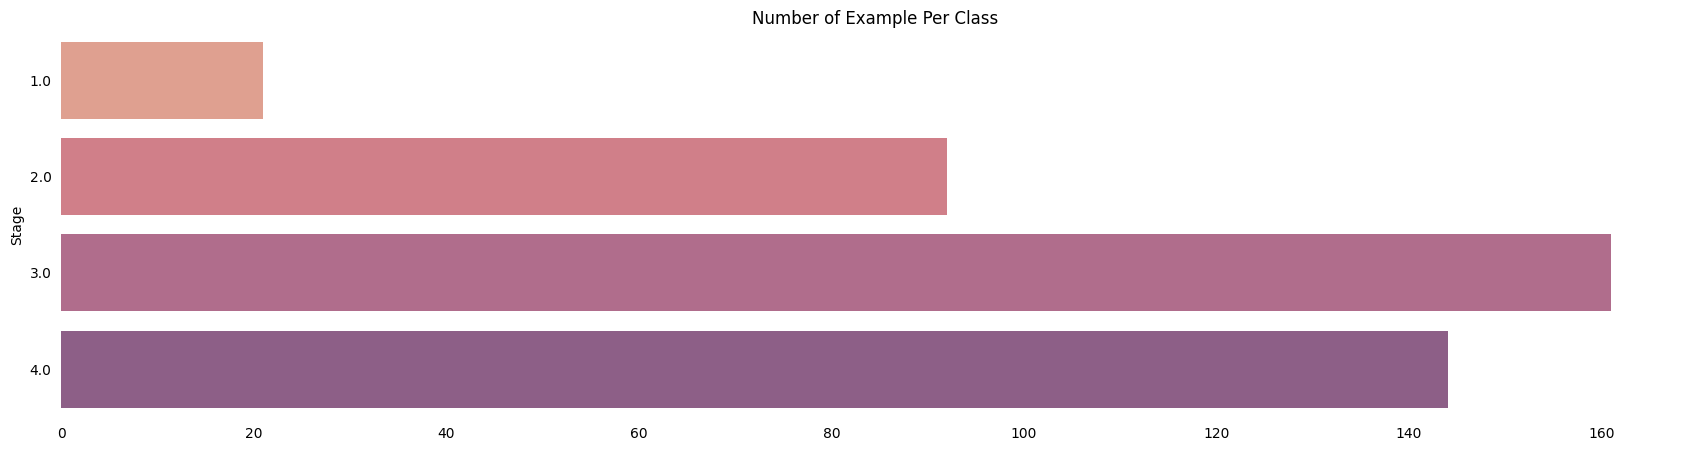

In [59]:
plt.figure(figsize=(21,5))
sns.countplot(y=df['Stage'], palette="flare", alpha=0.8, )
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Number of Example Per Class')

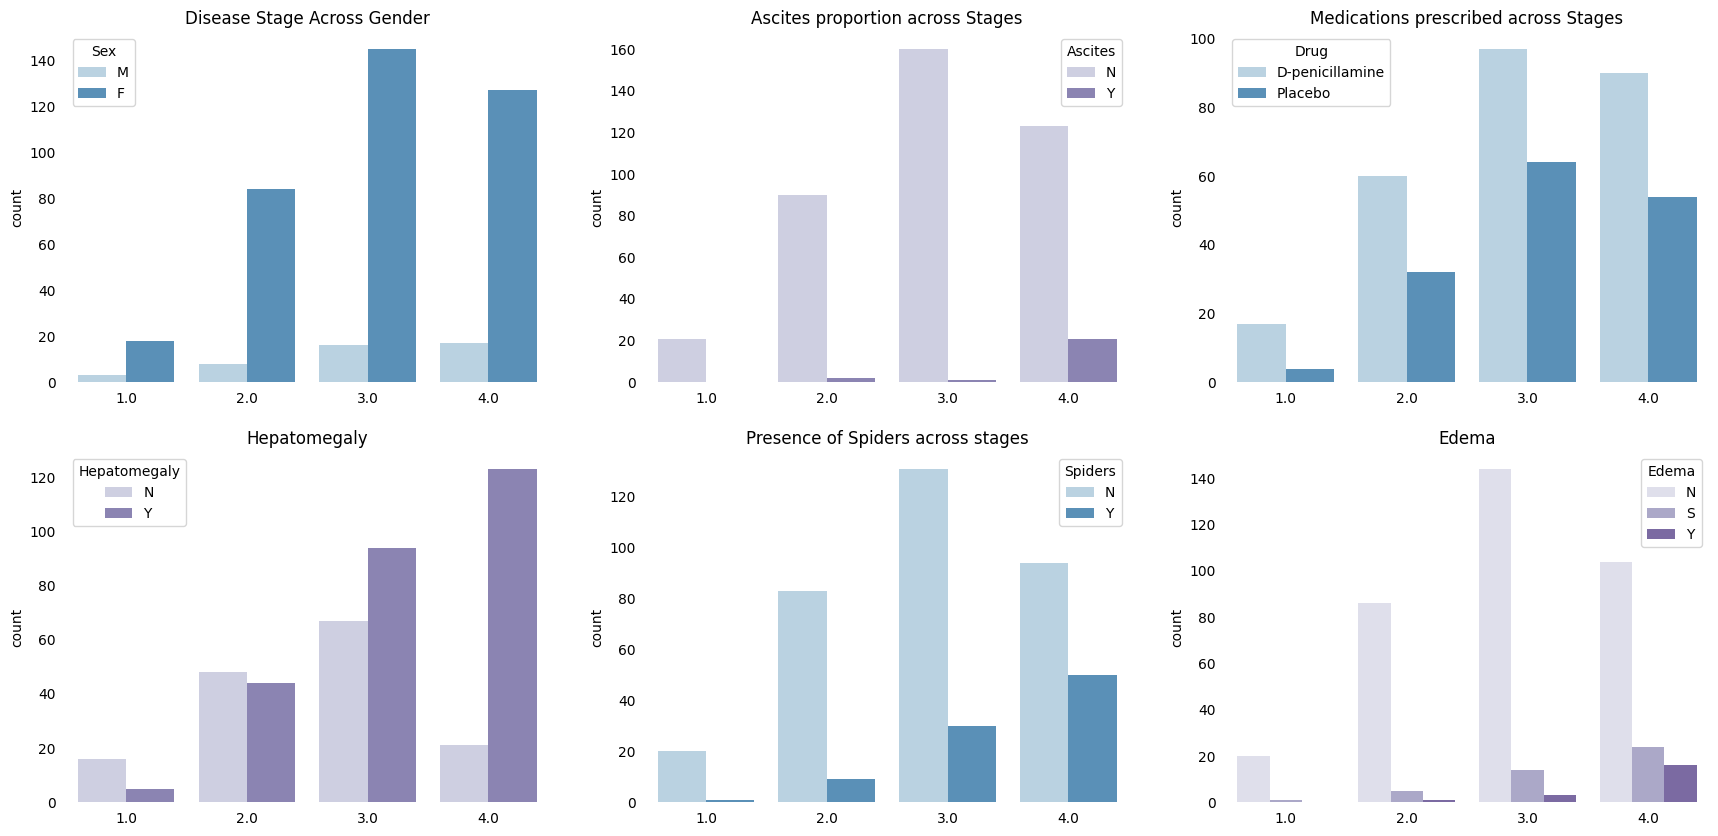

In [60]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=df['Stage'], hue=df['Sex'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Disease Stage Across Gender')

plt.subplot(2,3,2)
sns.countplot(x=df['Stage'], hue=df['Ascites'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Ascites proportion across Stages')

plt.subplot(2,3,3)
sns.countplot(x=df['Stage'], hue=df['Drug'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Medications prescribed across Stages');

plt.subplot(2,3,4)
sns.countplot(x=df['Stage'], hue=df['Hepatomegaly'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Hepatomegaly');

plt.subplot(2,3,5)
sns.countplot(x=df['Stage'], hue=df['Spiders'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Spiders across stages');

plt.subplot(2,3,6)
sns.countplot(x=df['Stage'], hue=df['Edema'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Edema');

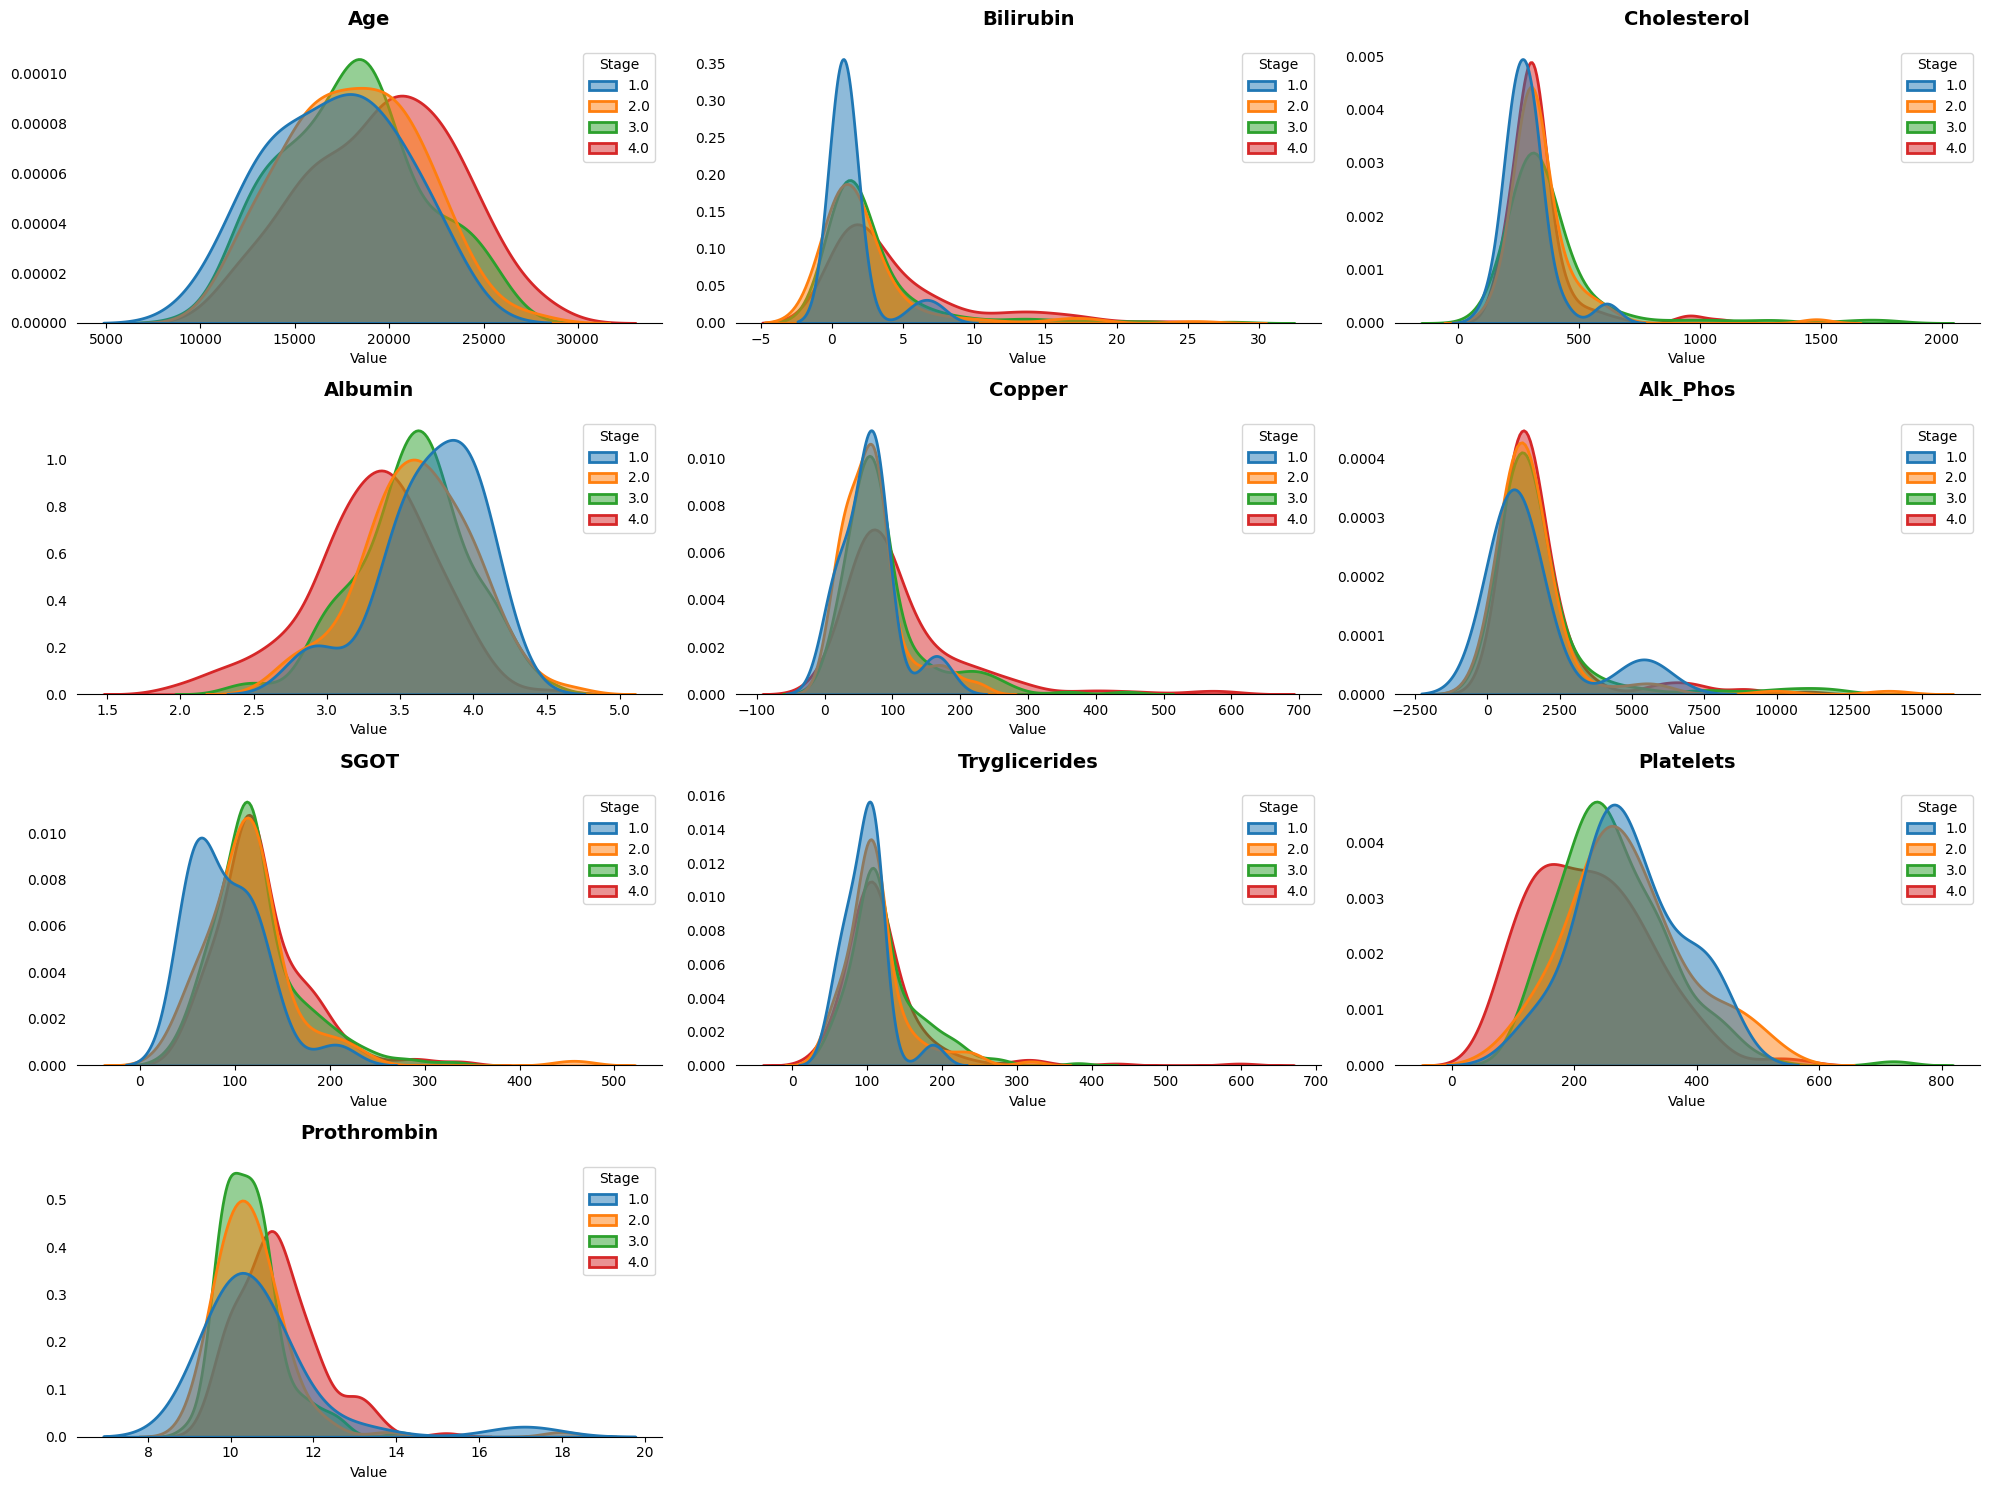

In [61]:
# 1. 데이터를 long-form으로 변환 (기존과 동일)
target_vars =['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
                  'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 실제 컬럼명과 일치하는지 확인하며 melt 수행
# (만약 df에 없는 컬럼이 리스트에 있으면 에러가 나므로 intersection 사용)
valid_vars = [v for v in target_vars if v in df.columns]
df_long = pd.melt(df, id_vars=['Stage'], value_vars=valid_vars, 
                  var_name='Variable', value_name='Value')

# 2. 그래프 그리기
plt.figure(figsize=(20, 15))

# Stage별로 확실하게 구분되는 색상 팔레트 지정
# 방법 A: 알록달록하게 구분 (명확도 최고)
custom_palette = "tab10" 
# 방법 B: 심각도 표현 (노랑 -> 주황 -> 빨강 -> 검정)
# custom_palette = ["#FFEDA0", "#FEB24C", "#F03B20", "#BD0026"] 

for i, variable in enumerate(valid_vars, 1):
    plt.subplot(4, 3, i)
    
    # 해당 변수 데이터만 필터링
    variable_data = df_long[df_long['Variable'] == variable]
    
    sns.kdeplot(
        data=variable_data,
        x='Value', 
        hue='Stage', 
        fill=True, 
        alpha=0.5,         # 투명도를 주어 겹치는 부분도 보이게 함
        palette=custom_palette, # 대비가 확실한 색상 사용
        common_norm=False, # [중요] 각 Stage별로 면적을 별도로 계산 (비율 왜곡 방지)
        linewidth=2        # 테두리 선을 굵게 하여 구분감 향상
    )
    
    # 스타일 정리
    sns.despine(top=True, right=True, left=True)
    plt.tick_params(left=False) # Y축 눈금 제거
    plt.ylabel('')              # Y축 라벨 제거 (깔끔하게)
    plt.title(f'{variable}', fontsize=14, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

In [62]:
# 1. 보고 싶은 변수 리스트 정의
target_vars = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
                  'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 실제 데이터프레임에 존재하는 컬럼만 선택 (에러 방지)
valid_vars = [v for v in target_vars if v in df.columns]

# 2. Stage별로 묶어서 중앙값(median), 평균(mean), 표준편차(std) 계산
# .T를 붙여서 행/열을 전환합니다 (Stage가 컬럼으로 오게 됨)
stat_df = df.groupby('Stage')[valid_vars].agg(['median', 'mean', 'std']).T

# 3. 보기 좋게 소수점 둘째 자리에서 반올림하여 출력
pd.options.display.float_format = '{:.2f}'.format
display(stat_df)

Stage                    1.00     2.00     3.00     4.00
Age           median 16929.00 17897.00 18102.00 19724.00
              mean   17108.71 18067.43 17997.52 19637.88
              std     3486.56  3515.28  3695.34  3953.22
Bilirubin     median     0.80     0.95     1.30     2.55
              mean       1.36     2.45     2.82     4.43
              std        1.79     4.14     4.14     4.86
Cholesterol   median   256.00   309.50   309.50   309.50
              mean     283.71   338.46   385.47   328.18
              std       95.82   152.12   251.15   139.82
Albumin       median     3.77     3.62     3.61     3.34
              mean       3.71     3.61     3.58     3.30
              std        0.35     0.38     0.38     0.44
Copper        median    73.00    73.00    73.00    73.00
              mean      65.24    69.43    87.22   113.58
              std       41.02    45.52    65.22    94.55
Alk_Phos      median  1003.00  1259.00  1259.00  1259.00
              mean    1590.59  1665.30  1872.51  1833.04
              std     1652.21  1841.87  2061.57  1712.34
SGOT          median    79.05   114.70   114.70   114.70
              mean      91.66   115.33   121.88   126.66
              std       39.47    53.42    47.60    47.72
Tryglicerides median   108.00   108.00   108.00   108.00
              mean      97.38   111.95   123.96   121.90
              std       28.26    44.31    49.40    65.51
Platelets     median   270.00   271.00   252.00   218.00
              mean     289.86   284.55   265.04   225.23
              std       83.38    98.36    90.59    96.98
Prothrombin   median    10.20    10.40    10.40    11.00
              mean      10.77    10.53    10.47    11.14
              std        1.64     1.08     0.76     0.99

## 이상치 분석


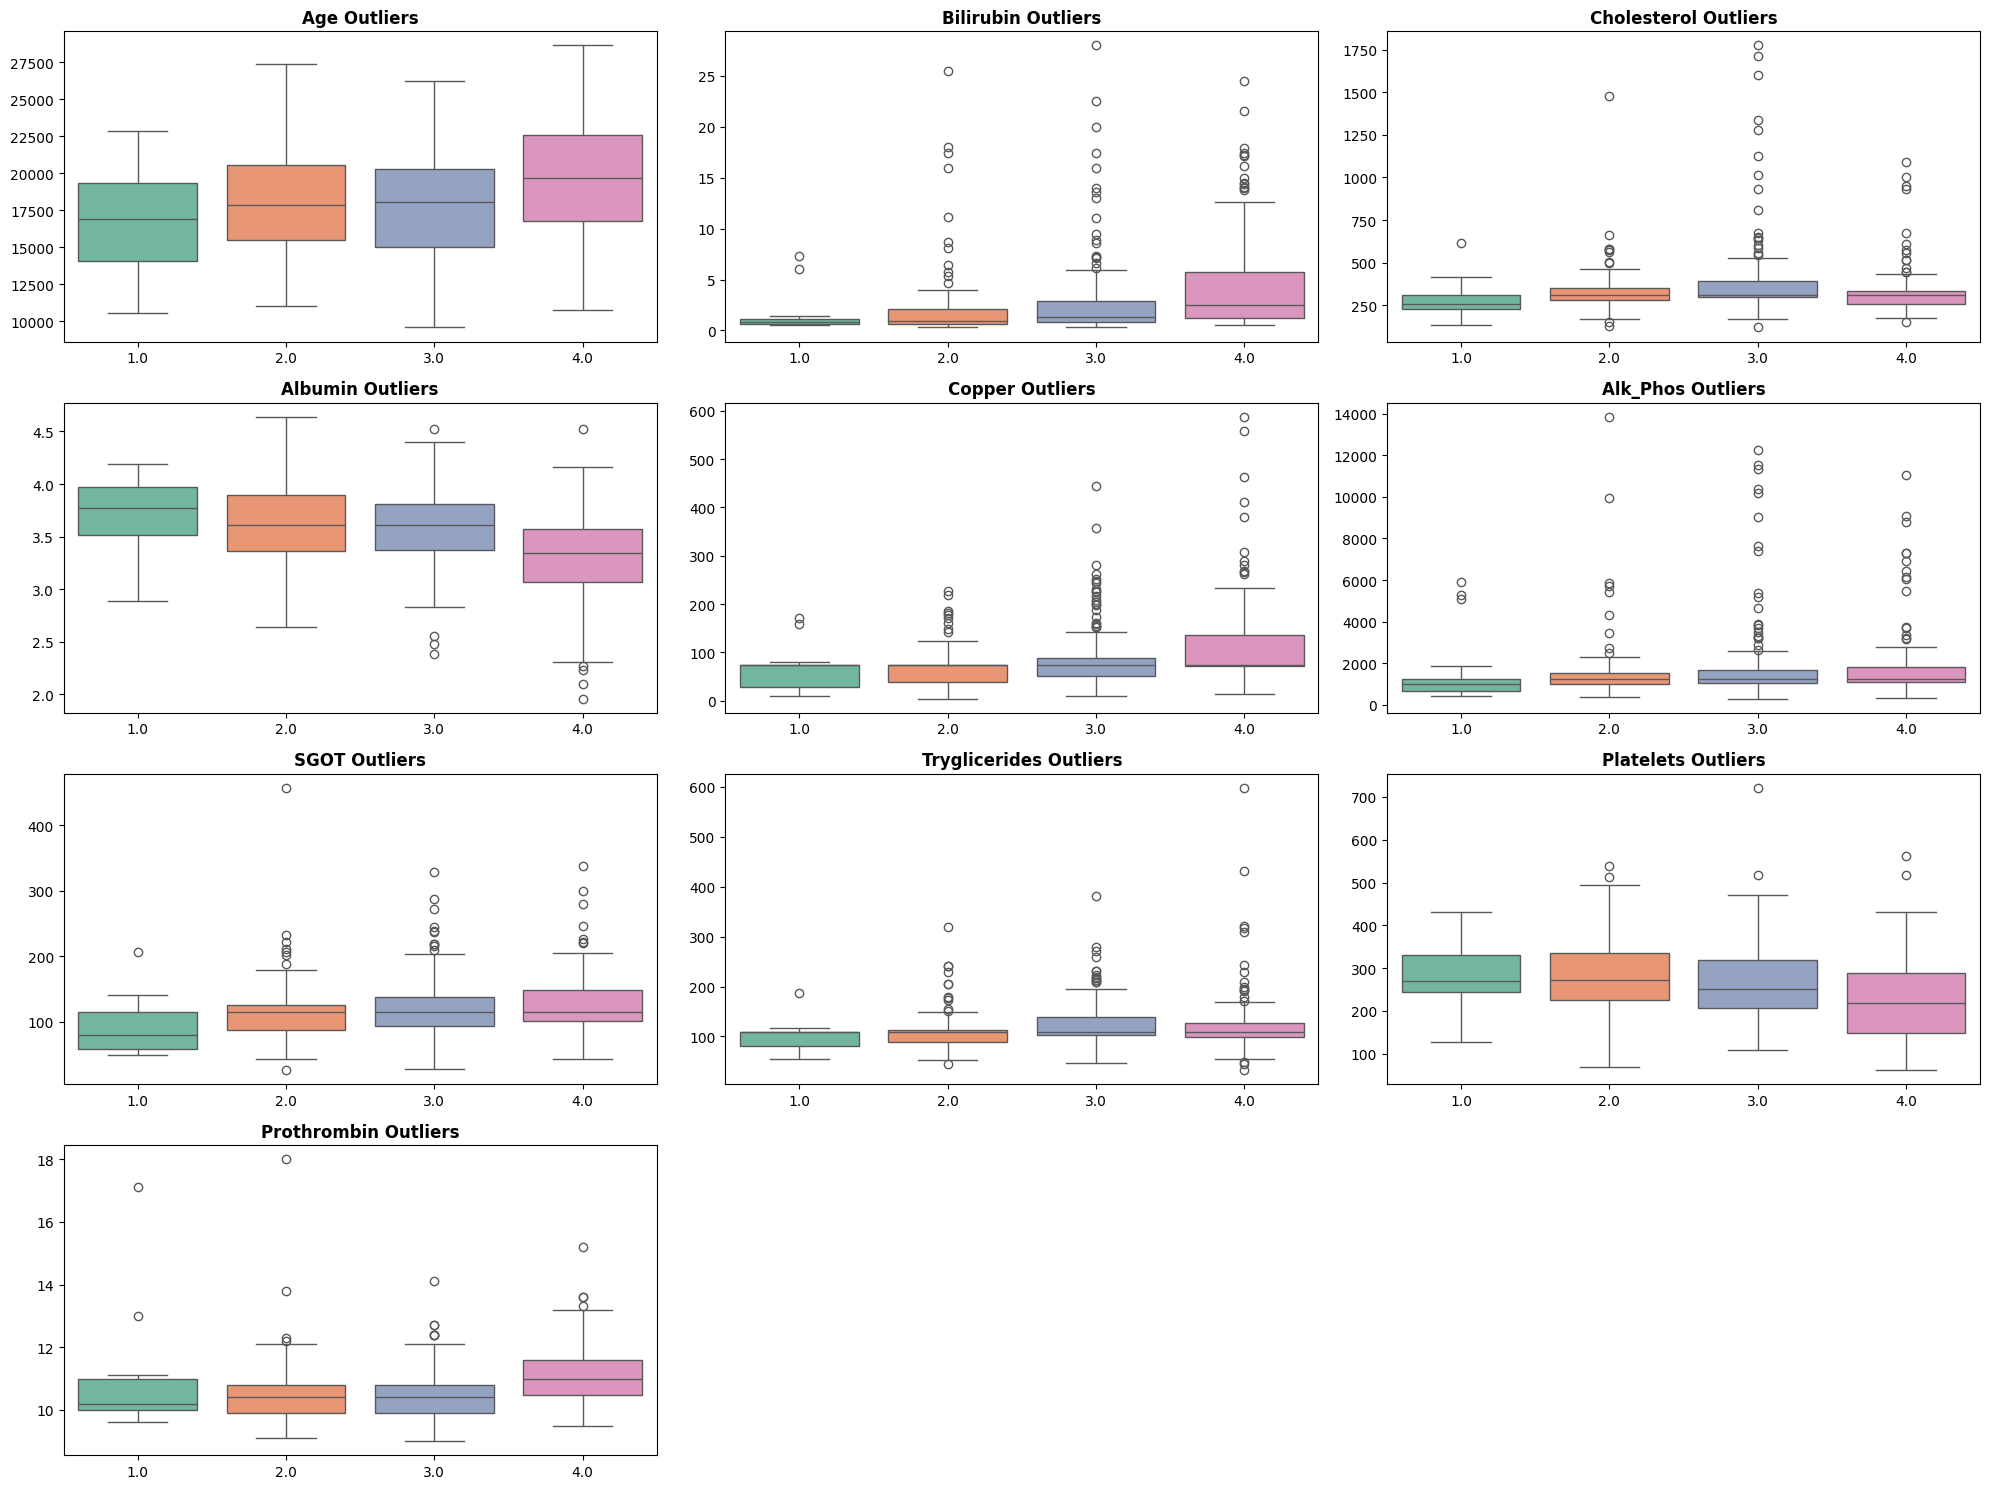

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 분석할 변수 리스트 (이전과 동일)
target_vars = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
                  'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 실제 데이터프레임에 있는 컬럼만 필터링
valid_vars = [v for v in target_vars if v in df.columns]

# 2. 그래프 그리기 (3x3 격자)
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten() # 반복문 돌리기 쉽게 1차원으로 펼침

for i, var in enumerate(valid_vars):
    # 박스플롯 그리기
    sns.boxplot(
        data=df, 
        x='Stage', 
        y=var, 
        ax=axes[i], 
        palette='Set2' # 색상 테마 (Set2, Set3, pastel 등 변경 가능)
    )
    
    # 제목 및 스타일 설정
    axes[i].set_title(f'{var} Outliers', fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# 남는 서브플롯(빈 칸)이 있다면 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* cholesterol, Bilirubin, Aik_Phos Copper:  값이 큰 이상치가 많음 
* Albumin: 큰 이상치도 존재하지만, 아래 꼬리가 비교적 많음 
* SGOT 등은 비교적 양호  
데이터가 적으므로 지우지 않고, 로그 변환 혹은 clipping(최대 혹은 최소로 값 조정)

### Log 변화 (이상치 누르기)

In [64]:
# 0. 전처리 전 데이터 복사
loged_datas = df.copy()

# (선택사항) 로그 변환 전 결측치가 있다면 먼저 채워주는 것이 좋습니다.
# 여기서는 Stage별 중앙값으로 채우는 로직을 간단히 적용합니다.
cat_cols = loged_datas.select_dtypes(include='object').columns
num_cols = loged_datas.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    loged_datas[col] = loged_datas[col].fillna(loged_datas.groupby('Stage')[col].transform('median'))

# 1. 로그 변환할 변수 리스트 (오른쪽으로 꼬리가 긴 변수들)
skewed_features = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
                  'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 2. 로그 변환 수행 (np.log1p 사용)
# 실제 존재하는 컬럼에 대해서만 수행
for col in skewed_features:
    if col in loged_datas.columns:
        loged_datas[col] = np.log1p(loged_datas[col])

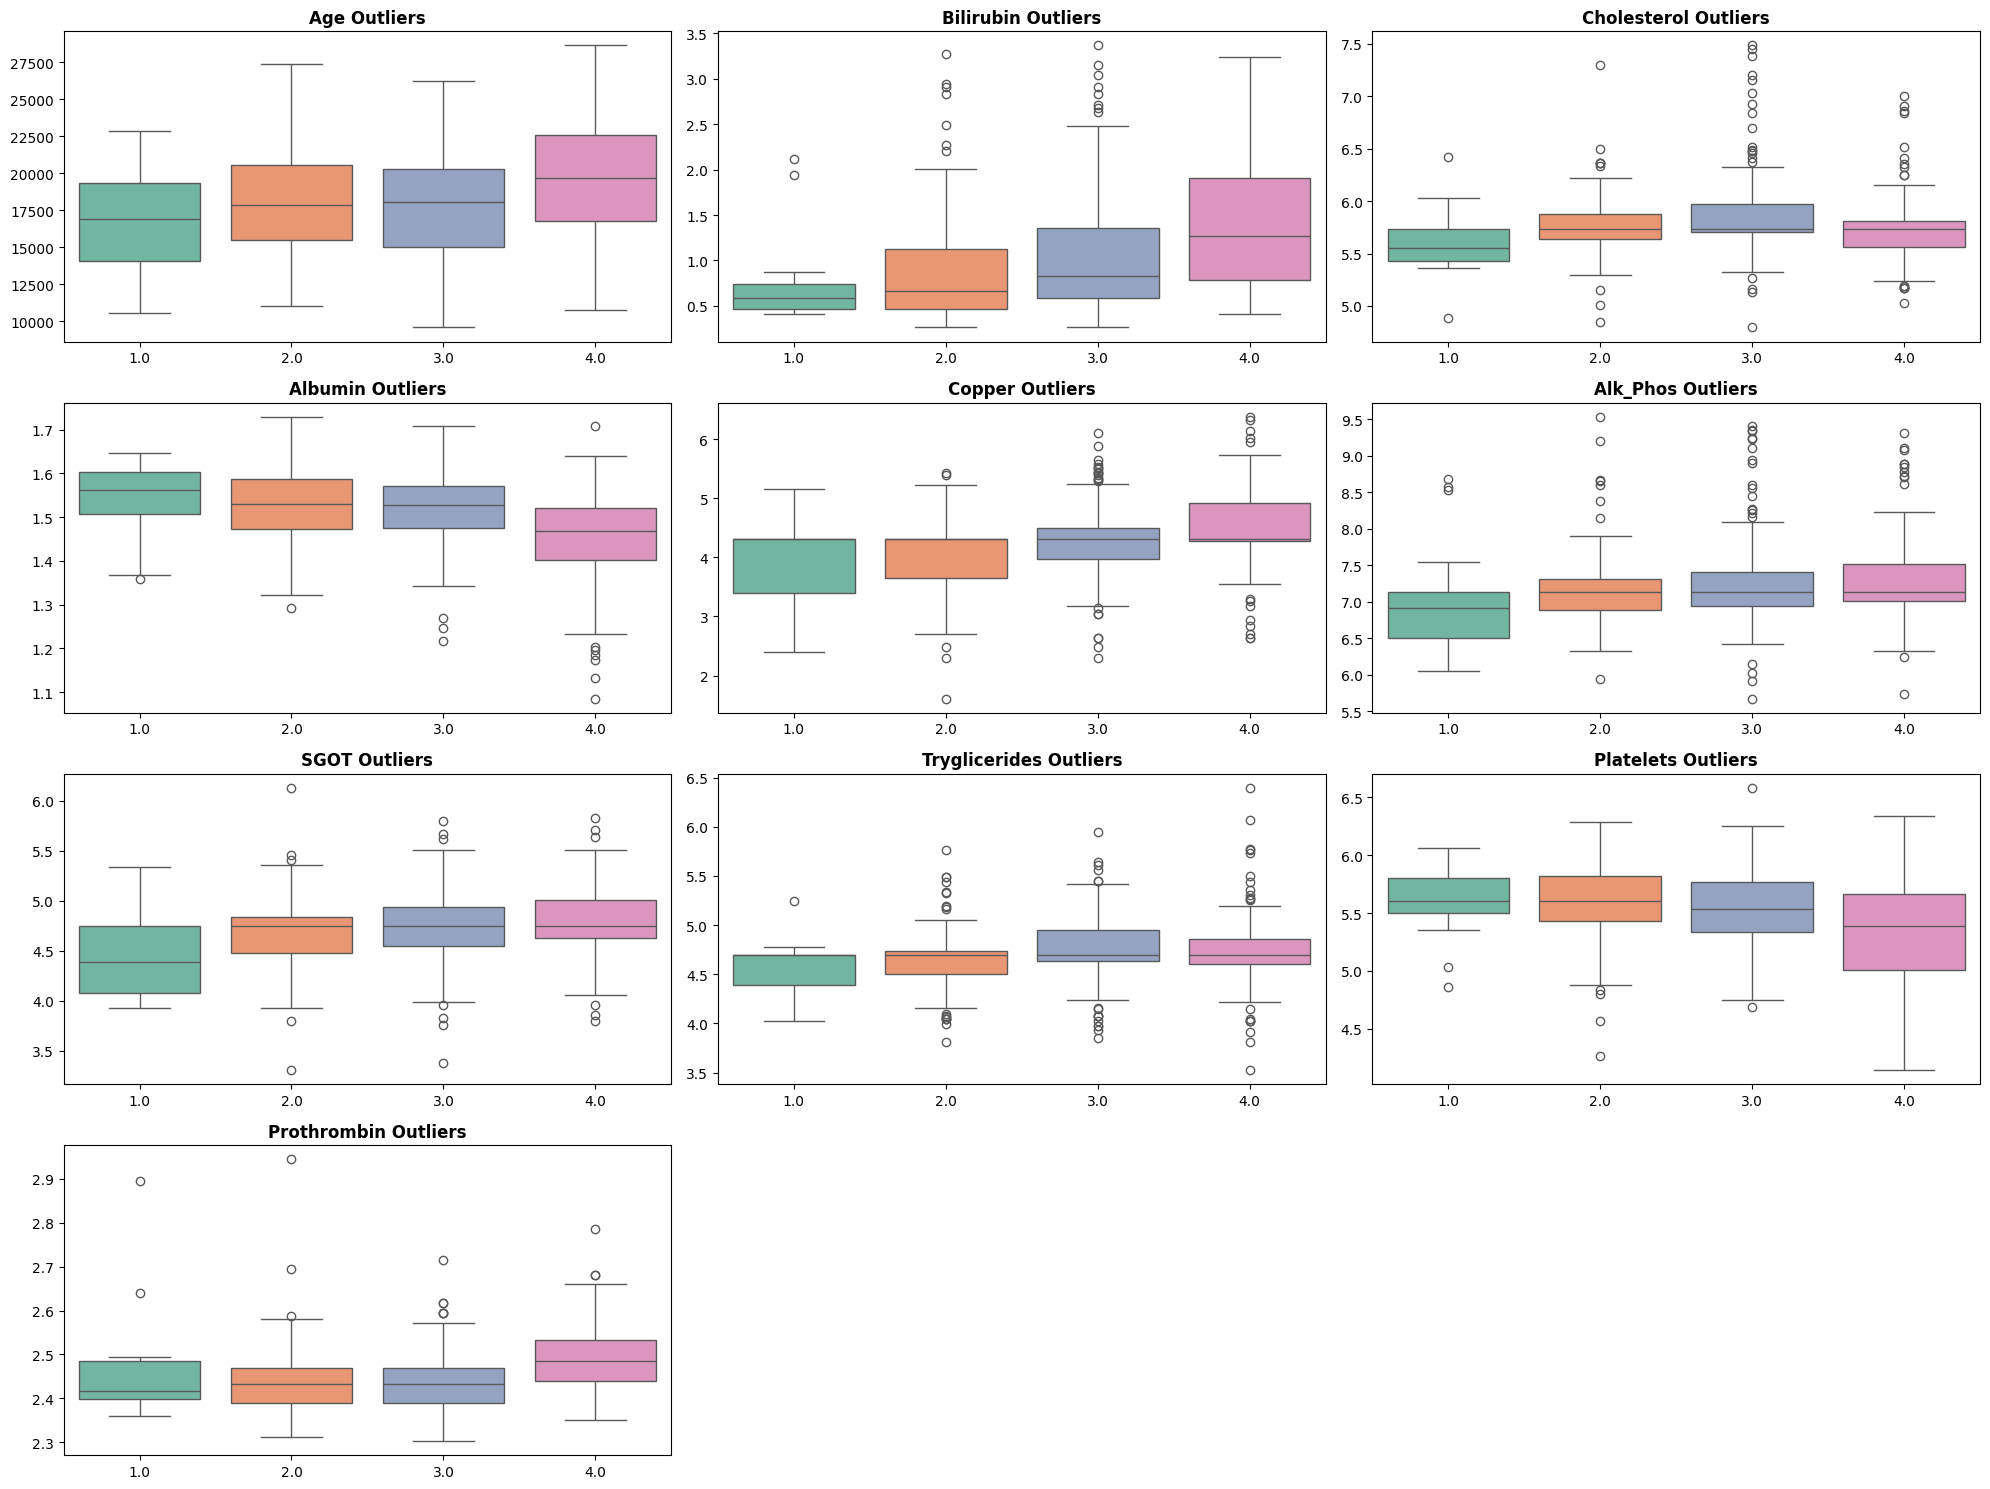

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 분석할 변수 리스트 (이전과 동일)
target_vars = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
               'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
# 실제 데이터프레임에 있는 컬럼만 필터링
valid_vars = [v for v in target_vars if v in loged_datas.columns]

# 2. 그래프 그리기 (3x3 격자)
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten() # 반복문 돌리기 쉽게 1차원으로 펼침

for i, var in enumerate(valid_vars):
    # 박스플롯 그리기
    sns.boxplot(
        data=loged_datas, 
        x='Stage', 
        y=var, 
        ax=axes[i], 
        palette='Set2' # 색상 테마 (Set2, Set3, pastel 등 변경 가능)
    )
    
    # 제목 및 스타일 설정
    axes[i].set_title(f'{var} Outliers', fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# 남는 서브플롯(빈 칸)이 있다면 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 로그 변환을 해도 아직 큰 이상치들이 많음

### clipping
* stage 별 각 변수의 상한과 하한으로 값 clipping 

In [66]:


# 1. 윈저라이징을 적용할 변수 리스트 (Age 제외)
target_vars = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
               'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 2. 원본 데이터 복사
clipped_df = df.copy()

# 3. Stage별로 윈저라이징 수행
# (Stage 목록을 가져와서 반복문 실행)
stages = clipped_df['Stage'].unique()

for stage in stages:
    # 해당 Stage에 해당하는 데이터만 필터링
    # 주의: 계산용으로만 쓰고, 값 변경은 clipped_df에 직접 해야 합니다.
    stage_mask = (clipped_df['Stage'] == stage)
    
    for col in target_vars:
        if col in clipped_df.columns:
            # 해당 Stage, 해당 변수의 데이터 추출
            stage_data = clipped_df.loc[stage_mask, col]
            
            # IQR 계산 (현재 Stage 기준)
            Q1 = stage_data.quantile(0.25)
            Q3 = stage_data.quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # [핵심] 해당 Stage의 데이터에만 clip 적용하여 원본(clipped_df) 업데이트
            clipped_df.loc[stage_mask, col] = stage_data.clip(lower=lower_bound, upper=upper_bound)



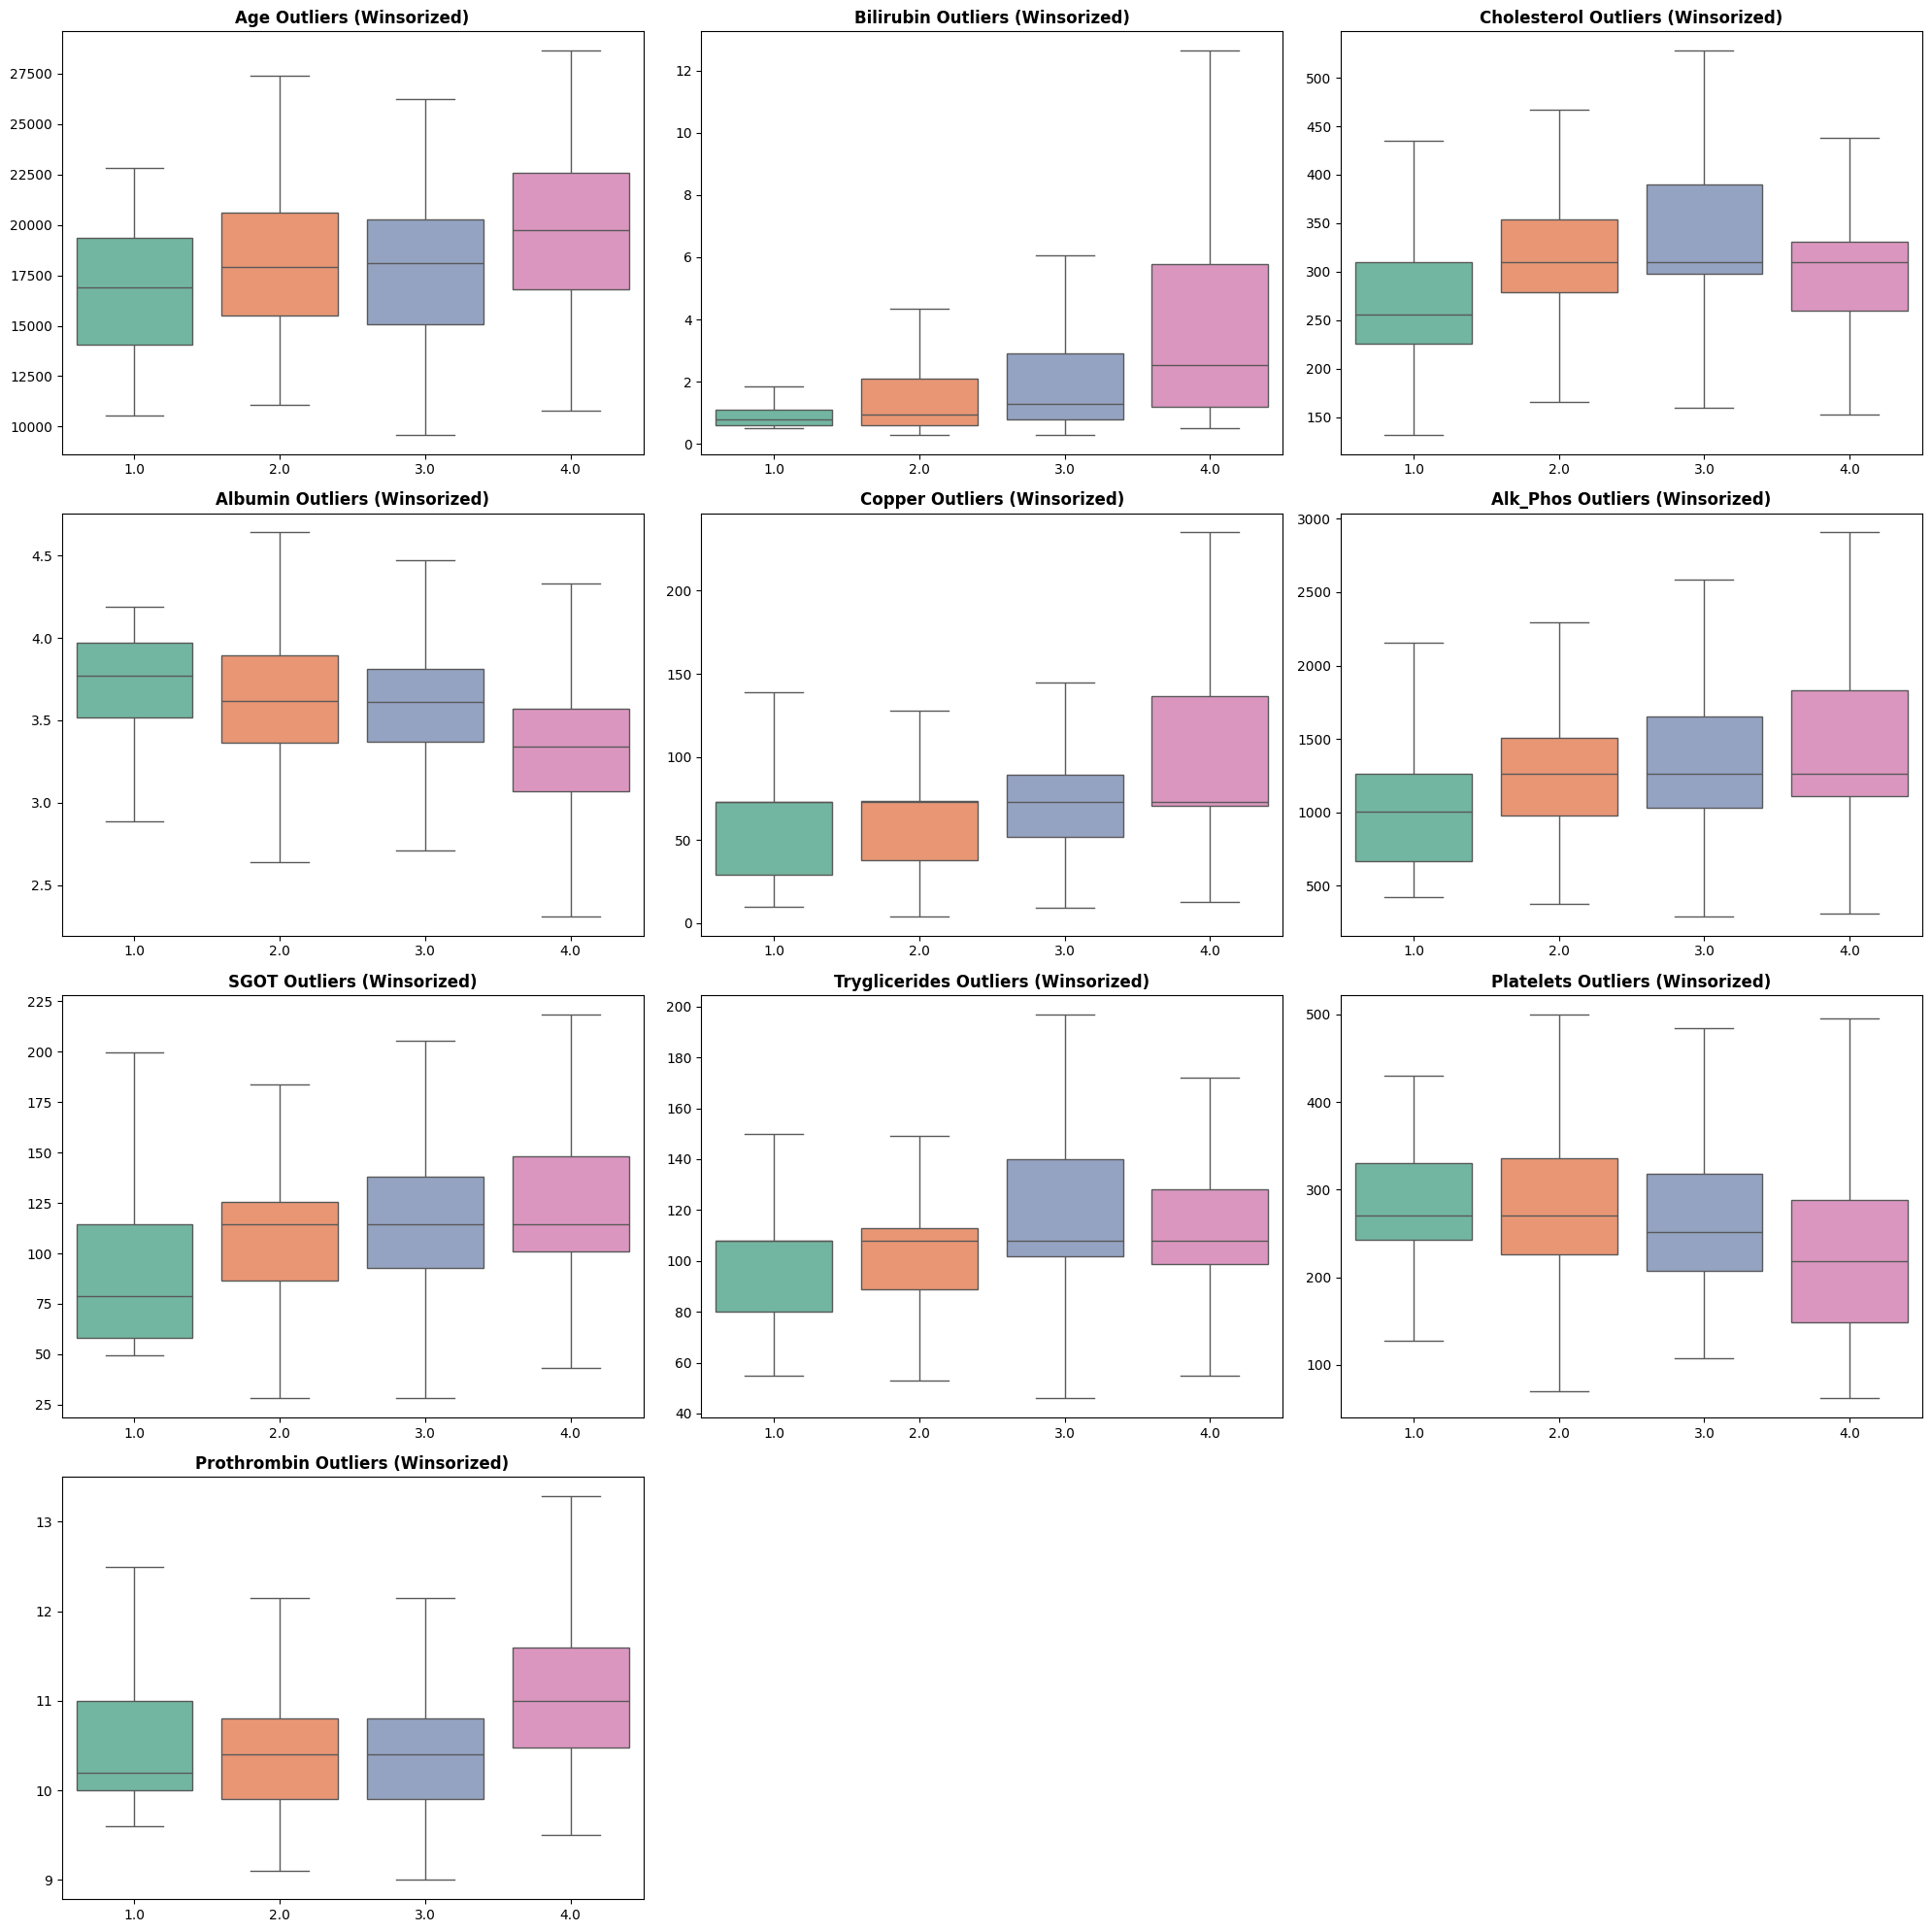

In [67]:
# 1. 분석할 변수 리스트 (10개)
target_vars = ['Age','Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
               'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 실제 데이터프레임에 있는 컬럼만 필터링
valid_vars = [v for v in target_vars if v in clipped_df.columns]

# 2. 그래프 그리기 (4행 3열 = 12칸 확보)
# 10개를 그려야 하므로 3x3(9개)은 부족합니다.
fig, axes = plt.subplots(4, 3, figsize=(20, 20)) 
axes = axes.flatten() 

for i, var in enumerate(valid_vars):
    # 박스플롯 그리기
    sns.boxplot(
        data=clipped_df, 
        x='Stage', 
        y=var, 
        ax=axes[i], 
        palette='Set2'
    )
    
    # 제목 및 스타일 설정
    axes[i].set_title(f'{var} Outliers (Winsorized)', fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# 남는 서브플롯(11번째, 12번째 빈 칸) 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [68]:
clipped_df.describe(include='all')

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.00,418,418,418.00,418,418,418,418,418,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00,418.00
unique,NaN,3,2,NaN,2,2,2,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,C,D-penicillamine,NaN,F,N,Y,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,232,264,NaN,374,394,266,328,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1917.78,NaN,NaN,18533.35,NaN,NaN,NaN,NaN,NaN,2.61,320.68,3.50,82.27,1406.07,117.80,113.00,255.88,10.69,3.02
std,1104.67,NaN,NaN,3815.85,NaN,NaN,NaN,NaN,NaN,2.82,81.32,0.41,49.04,614.12,40.36,33.66,93.82,0.85,0.88
min,41.00,NaN,NaN,9598.00,NaN,NaN,NaN,NaN,NaN,0.30,132.00,2.31,4.00,289.00,28.17,46.00,62.00,9.00,1.00
25%,1092.75,NaN,NaN,15644.50,NaN,NaN,NaN,NaN,NaN,0.80,273.00,3.24,51.25,1016.25,91.00,95.00,190.00,10.00,2.00
50%,1730.00,NaN,NaN,18628.00,NaN,NaN,NaN,NaN,NaN,1.40,309.50,3.53,73.00,1259.00,114.70,108.00,251.00,10.60,3.00
75%,2613.50,NaN,NaN,21272.50,NaN,NaN,NaN,NaN,NaN,3.40,347.75,3.77,100.75,1707.75,135.75,127.75,315.50,11.10,4.00


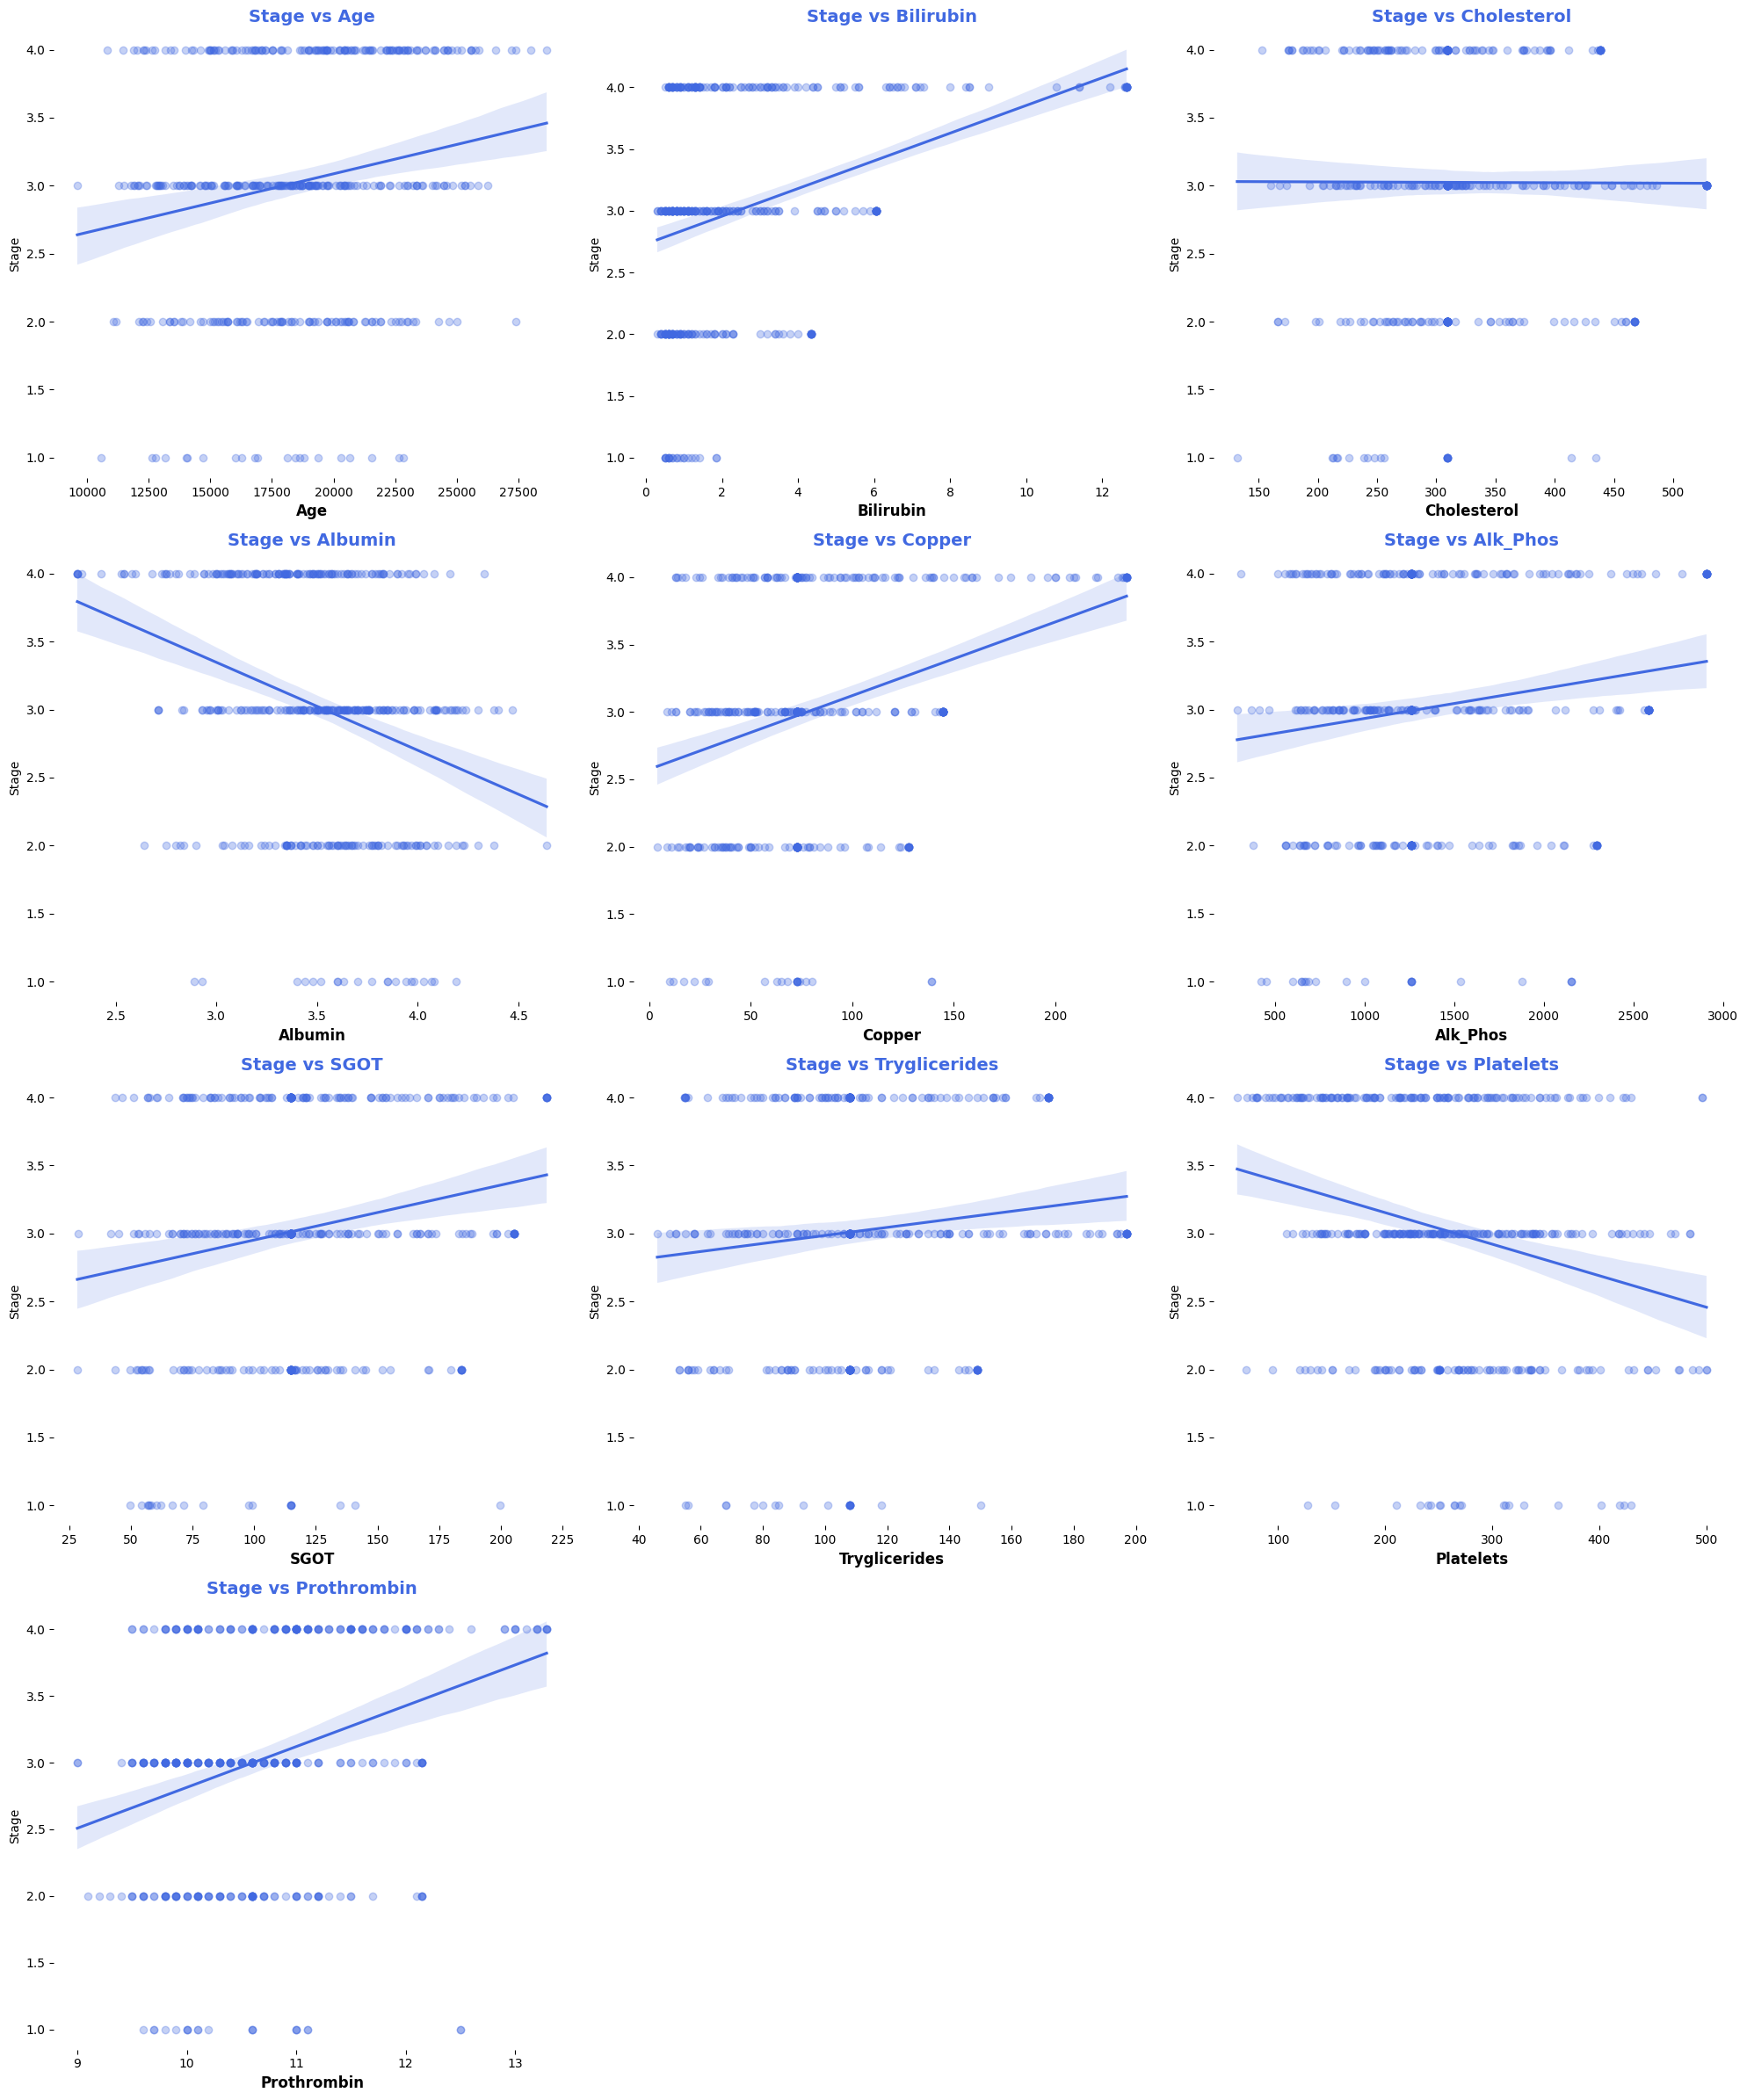

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 분석할 변수 리스트
target_vars = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
               'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 2. 데이터 준비 (가장 최근에 작업한 encoded_df 또는 clipped_df 사용)
# 라벨 인코딩과 윈저라이징이 끝난 데이터를 사용하는 것이 좋습니다.
plot_df = clipped_df.copy() 

# Stage가 숫자로 되어있는지 확실하게 변환 (에러 방지)
plot_df['Stage'] = pd.to_numeric(plot_df['Stage'], errors='coerce')

# 3. 그래프 그리기 (4행 3열 = 12칸)
fig, axes = plt.subplots(4, 3, figsize=(20, 24))
axes = axes.flatten()

for i, var in enumerate(target_vars):
    if var in plot_df.columns:
        # 데이터가 문자열이면 regplot을 못 그리므로 숫자형으로 변환 시도
        plot_df[var] = pd.to_numeric(plot_df[var], errors='coerce')
        
        # 회귀 그래프 그리기 (User Style 적용)
        sns.regplot(
            x=plot_df[var], 
            y=plot_df['Stage'], 
            scatter=True, 
            logistic=False,     # 선형 회귀선 표시
            color='royalblue',  # 요청하신 색상
            ax=axes[i],
            scatter_kws={'alpha': 0.3} # 점이 겹쳐도 보이게 투명도 추가 (꿀팁)
        )
        
        # 스타일링 (요청하신 despine 및 tick 설정)
        sns.despine(top=True, right=True, left=True, bottom=True, ax=axes[i])
        axes[i].tick_params(axis='both', which='both', bottom=True, top=False, left=True)
        
        axes[i].set_xlabel(var, fontsize=12, fontweight='bold')
        axes[i].set_ylabel('Stage')
        axes[i].set_title(f'Stage vs {var}', color='royalblue', fontsize=14, fontweight='bold')

# 남는 서브플롯 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. **핵심 위험 인자 (강한 양의 상관관계 ↗)**
    * 수치가 높을수록 Stage가 높아짐 (모델의 중요 예측 변수)
    * **Bilirubin (빌리루빈):** 가장 가파른 우상향. 간부전의 핵심 지표.
    * **Prothrombin (프로트롬빈 시간):** 응고 지연 시간 증가. 매우 강력한 위험 신호.
    * **Copper (구리):** 체내 구리 축적량 증가가 병의 진행과 직결됨.

2. **핵심 기능 저하 지표 (강한 음의 상관관계 ↘)**
    * 수치가 낮을수록 Stage가 높아짐 (간 기능 저하 의미)
    * **Albumin (알부민):** 가장 뚜렷한 우하향. 간 합성 능력 저하를 나타냄.
    * **Platelets (혈소판):** 비장 비대 등으로 인한 혈소판 감소 확인.

3. **중등도 위험 인자 (약한 양의 상관관계 ↗)**
    * **Age (나이):** 고령일수록 병의 단계가 높은 경향.
    * **SGOT (AST) & Alk_Phos:** 간 손상 시 수치가 상승하나, 기울기가 아주 가파르지는 않음.

4. **상관관계 미미 (수평 ➡)**
    * Stage 예측에 큰 영향력이 없을 것으로 예상됨
    * **Cholesterol (콜레스테롤):** 기울기가 거의 없음.
    * **Triglycerides (중성지방):** 변별력이 매우 낮음.

### prepare train

In [70]:
from sklearn.preprocessing import LabelEncoder

# 1. 이전 단계에서 전처리가 완료된 데이터 복사 (원본 보존)
# 변수명이 clipped_df가 맞는지 확인하세요.
encoded_df = clipped_df.copy()

# 2. 범주형(Object) 컬럼만 골라내기
object_cols = encoded_df.select_dtypes(include='object').columns
print(f"라벨 인코딩 대상 컬럼: {list(object_cols)}")

# 3. 라벨 인코딩 수행
le = LabelEncoder()

# 나중에 어떤 숫자가 어떤 문자인지 확인하기 위해 매핑 정보를 저장할 딕셔너리
mapping_dict = {}

for col in object_cols:
    # 인코딩 수행
    encoded_df[col] = le.fit_transform(encoded_df[col])
    
    # 매핑 정보 저장 (예: 'F': 0, 'M': 1)
    mapping_dict[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# 4. 결과 확인
print("\n✅ 라벨 인코딩이 완료되었습니다.")
print("-" * 30)
display(encoded_df.head())

# 5. (참고용) 어떻게 변환되었는지 확인
print("\n🔍 변환 매핑 정보 (어떤 숫자가 어떤 문자인지):")
for col, maps in mapping_dict.items():
    print(f"{col}: {maps}")

라벨 인코딩 대상 컬럼: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

✅ 라벨 인코딩이 완료되었습니다.
------------------------------


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,2,0,21464,0,1,1,1,2,12.64,261.00,2.60,156.00,1718.00,137.95,171.88,190.00,12.20,4.00
2,4500,0,0,20617,0,0,1,1,0,1.10,302.00,4.14,54.00,2586.00,113.52,88.00,221.00,10.60,3.00
3,1012,2,0,25594,1,0,0,0,1,1.40,176.00,3.48,210.00,516.00,96.10,55.00,151.00,12.00,4.00
4,1925,2,0,19994,0,0,1,1,1,1.80,244.00,2.54,64.00,2907.75,60.63,92.00,183.00,10.30,4.00
5,1504,1,1,13918,0,0,1,1,0,3.40,279.00,3.53,143.00,671.00,113.15,72.00,136.00,10.90,3.00



🔍 변환 매핑 정보 (어떤 숫자가 어떤 문자인지):
Status: {'C': 0, 'CL': 1, 'D': 2}
Drug: {'D-penicillamine': 0, 'Placebo': 1}
Sex: {'F': 0, 'M': 1}
Ascites: {'N': 0, 'Y': 1}
Hepatomegaly: {'N': 0, 'Y': 1}
Spiders: {'N': 0, 'Y': 1}
Edema: {'N': 0, 'S': 1, 'Y': 2}


In [71]:
X=encoded_df.drop(['Stage','Drug','N_Days','Status','Age'],axis=1)
y=encoded_df[["Stage"]]

In [72]:
# 2. 개수 세기 (Stage 컬럼 기준)
stage_counts = y['Stage'].value_counts().sort_index()

# 3. 데이터프레임 만들기
df_counts = pd.DataFrame({'개수(Count)': stage_counts})

# 4. [핵심] sum을 이용해서 'Total' 행 추가하기
df_counts.loc['Total Sum'] = df_counts.sum()

# 5. 출력
print("📊 전체 데이터의 Stage별 분포:")
print("-" * 30)
print(df_counts)
print("-" * 30)

📊 전체 데이터의 Stage별 분포:
------------------------------
            개수(Count)
Stage                
1.00               21
2.00               92
3.00              161
4.00              144
 Total Sum        418
------------------------------


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.10,
    random_state=42,
    stratify=y  # <--- 이 부분이 핵심입니다!
)

print(f"X_Train set: {X_train.shape}")
print(f"X_Test set: {X_test.shape}")
print(f"y_Train set: {y_train.shape}")
print(f"y_Test set: {y_test.shape}")

X_Train set: (376, 14)
X_Test set: (42, 14)
y_Train set: (376, 1)
y_Test set: (42, 1)


✅ 라벨이 이미 0부터 시작하거나 조정되어 있습니다.

Model                | Accuracy  
Logistic Regression  | 0.5000
Random Forest        | 0.6429
LightGBM             | 0.6429
XGBoost              | 0.7143
----------------------------------------

🔍 XGBoost 상세 평가 보고서:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.75      0.67      0.71         9
           2       0.65      0.81      0.72        16
           3       0.83      0.67      0.74        15

    accuracy                           0.71        42
   macro avg       0.68      0.66      0.67        42
weighted avg       0.73      0.71      0.71        42


📊 SHAP 해석 (XGBoost Model):


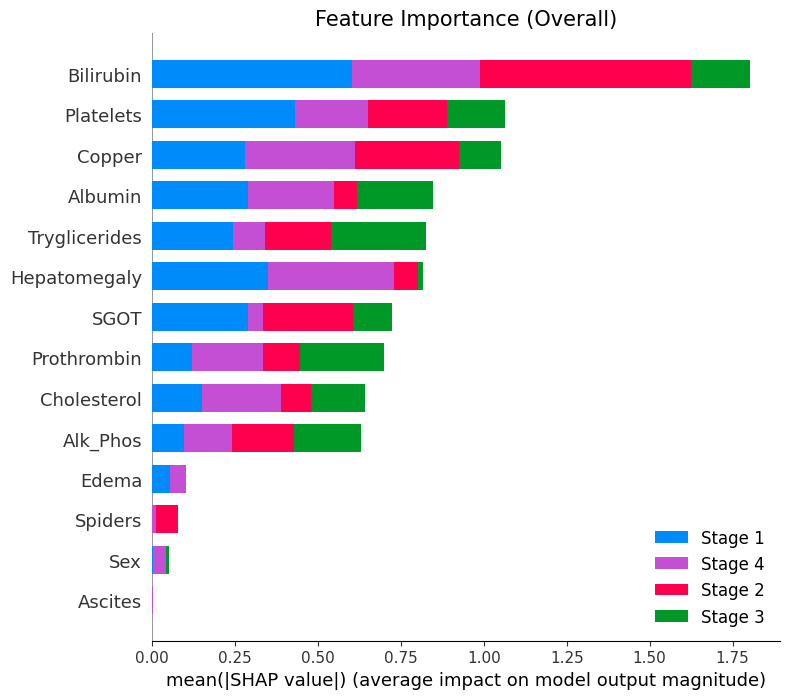

📊 SHAP 데이터 타입: <class 'numpy.ndarray'>
👉 3차원 배열 형태 감지 (Shape: (42, 14, 4))


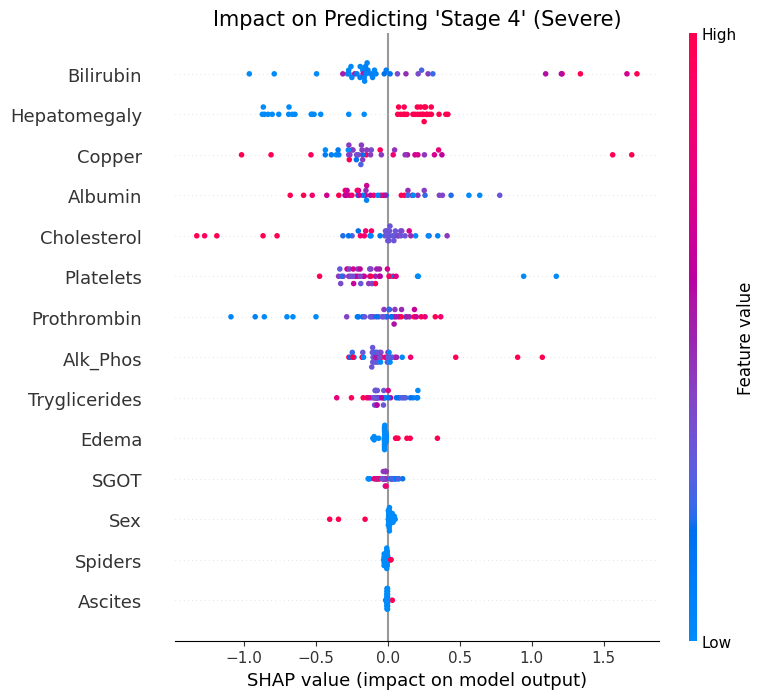

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier # LightGBM 추가
# 평가 및 설명 라이브러리
from sklearn.metrics import accuracy_score, classification_report
import shap



# .values를 사용하여 데이터 타입(Series/Array) 상관없이 안전하게 최솟값 확인
if np.min(y_train.values) == 1:
    print("✅ 라벨을 0~3 범위로 조정합니다 (1씩 차감).")
    y_train = y_train.astype(int) - 1
    y_test = y_test.astype(int) - 1
else:
    print("✅ 라벨이 이미 0부터 시작하거나 조정되어 있습니다.")

    models = {
        "Logistic Regression": LogisticRegression(max_iter=3000, random_state=42),

        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        
        # [NEW] LightGBM: 속도와 성능의 균형이 아주 좋음
        "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1),
        
        "XGBoost": XGBClassifier(
            n_estimators=100, 
            learning_rate=0.1, 
            max_depth=5, 
            random_state=42, 
            eval_metric='mlogloss',
            use_label_encoder=False
        )
    }

# 모델 학습 및 정확도 비교
print("\n" + "="*40)
print(f"{'Model':<20} | {'Accuracy':<10}")
print("="*40)

trained_models = {}

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        acc = accuracy_score(y_test, pred)
        print(f"{name:<20} | {acc:.4f}")
        trained_models[name] = model
    except Exception as e:
        print(f"{name:<20} | Error: {e}")

print("-" * 40)

# XGBoost 상세 평가 결과
print("\n🔍 XGBoost 상세 평가 보고서:")
best_model = trained_models['XGBoost']
xgb_pred = best_model.predict(X_test)
print(classification_report(y_test, xgb_pred))

# 4. SHAP 시각화
print("\n📊 SHAP 해석 (XGBoost Model):")
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# (1) 전체 변수 중요도 (Bar Plot)
plt.figure()
plt.title("Feature Importance (Overall)", fontsize=15)
# plot_type='bar'는 형태가 달라도 보통 잘 작동합니다.
shap.summary_plot(shap_values, X_test, plot_type="bar", 
                  class_names=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], show=False)
plt.show()

# (2) Stage 4 영향력 분석 (형태 감지 로직 추가됨)
print(f"📊 SHAP 데이터 타입: {type(shap_values)}")
target_class_idx = 3 # Stage 4

if isinstance(shap_values, list):
    # (구버전) 리스트 형태 -> [Stage1, Stage2, Stage3, Stage4]
    print(f"👉 리스트 형태 감지 (길이: {len(shap_values)})")
    if len(shap_values) > target_class_idx:
        values_to_plot = shap_values[target_class_idx]
    else:
        values_to_plot = shap_values # 예외 처리
        
elif hasattr(shap_values, 'shape') and len(shap_values.shape) == 3:
    # (신버전) 3차원 배열 형태 -> (샘플 수, 변수 수, 클래스 수)
    print(f"👉 3차원 배열 형태 감지 (Shape: {shap_values.shape})")
    values_to_plot = shap_values[:, :, target_class_idx]
    
else:
    # 이진 분류거나 2차원 배열인 경우 그대로 사용
    print("👉 2차원 배열 형태 감지")
    values_to_plot = shap_values

# 그래프 그리기
plt.figure()
plt.title("Impact on Predicting 'Stage 4' (Severe)", fontsize=15)
shap.summary_plot(values_to_plot, X_test, show=False)
plt.show()

### GridSearch & CrossValidation


🔥 모델별 교차 검증(Cross Validation) 진행 중...
Model                | Mean CV Score   | Std Dev (안정성)
------------------------------------------------------------
Logistic Regression  | 0.5532          | ±0.0343
Random Forest        | 0.6198          | ±0.0201
LightGBM             | 0.5799          | ±0.0200
XGBoost              | 0.6329          | ±0.0260
🏆 최종 1등 모델: XGBoost (평균 정확도: 0.6329)


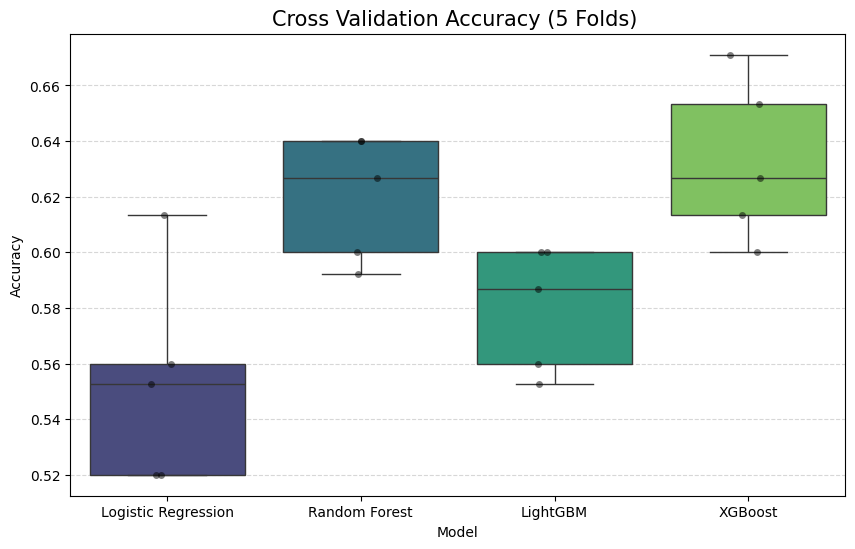


🔍 [XGBoost] 최종 테스트셋(Test Set) 상세 보고서:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.62      0.56      0.59         9
           2       0.55      0.75      0.63        16
           3       0.91      0.67      0.77        15

    accuracy                           0.64        42
   macro avg       0.52      0.49      0.50        42
weighted avg       0.67      0.64      0.64        42


📊 [XGBoost] SHAP 분석 시작...


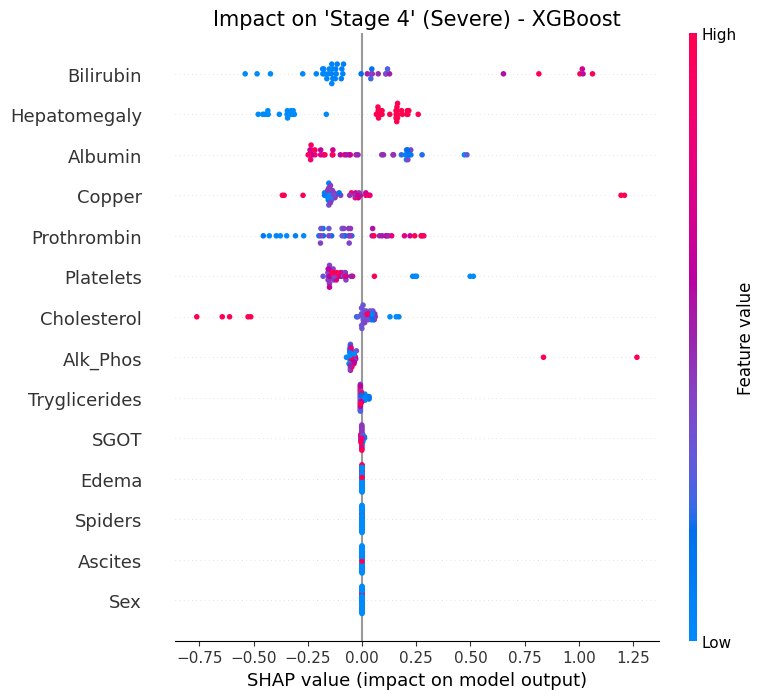

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 무시
warnings.filterwarnings('ignore')

# 모델 및 유틸리티
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
import shap

# ---------------------------------------------------------
# 1. 라벨(y) 0부터 시작하도록 조정 (안전장치)
# ---------------------------------------------------------
if np.min(y_train.values) == 1:
    y_train = y_train.astype(int) - 1
    y_test = y_test.astype(int) - 1

# ---------------------------------------------------------
# 2. 하이퍼파라미터 그리드 (탐색 범위)
# ---------------------------------------------------------
param_grids = {
    "Logistic Regression": {
        'model': LogisticRegression(random_state=42, max_iter=3000),
        'params': {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
    },
    "Random Forest": {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [100, 200], 'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2]}
    },
    "LightGBM": {
            'model': LGBMClassifier(random_state=42, verbose=-1), # verbose=-1: 불필요한 경고 끄기
            'params': {
                'n_estimators': [100, 200], 
                'learning_rate': [0.05, 0.1], 
                'max_depth': [3, 5, 10]
            }
        },
    "XGBoost": {
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
    }
}

# ---------------------------------------------------------
# 3. GridSearch & Cross Validation 상세 분석
# ---------------------------------------------------------
results_list = []      # 그래프 그리기용 데이터 저장소
best_models = {}       # 튜닝된 최적 모델 저장소
final_best_score = 0
final_best_name = ""

print("\n🔥 모델별 교차 검증(Cross Validation) 진행 중...")
print("="*60)
print(f"{'Model':<20} | {'Mean CV Score':<15} | {'Std Dev (안정성)'}")
print("-" * 60)

# 5-Fold 설정 (Stratified: 라벨 비율 유지)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, config in param_grids.items():
    # 1) 그리드 서치로 '최적 파라미터' 찾기
    grid = GridSearchCV(config['model'], config['params'], cv=cv_strategy, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    # 2) 찾은 최적 모델 저장
    best_model = grid.best_estimator_
    best_models[name] = best_model
    
    # 3) [핵심] 최적 모델로 다시 CV를 돌려서 '5번의 점수'를 모두 확보
    # 이렇게 해야 그래프를 그릴 수 있습니다.
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv_strategy, scoring='accuracy')
    
    # 결과 출력
    mean_score = cv_scores.mean()
    std_score = cv_scores.std()
    print(f"{name:<20} | {mean_score:.4f}          | ±{std_score:.4f}")
    
    # 그래프용 데이터 저장
    for score in cv_scores:
        results_list.append({'Model': name, 'CV Accuracy': score})
        
    # 챔피언 모델 갱신
    if mean_score > final_best_score:
        final_best_score = mean_score
        final_best_name = name

print("="*60)
print(f"🏆 최종 1등 모델: {final_best_name} (평균 정확도: {final_best_score:.4f})")

# ---------------------------------------------------------
# 4. 교차 검증 결과 시각화 (Box Plot)
# ---------------------------------------------------------
results_df = pd.DataFrame(results_list)

plt.figure(figsize=(10, 6))
# 박스 플롯: 점수 분포와 안정성을 보여줌
sns.boxplot(data=results_df, x='Model', y='CV Accuracy', palette='viridis')
# 스트립 플롯: 실제 점수 하나하나를 점으로 찍어줌
sns.stripplot(data=results_df, x='Model', y='CV Accuracy', color='black', alpha=0.5, jitter=True)

plt.title(f'Cross Validation Accuracy (5 Folds) ', fontsize=15)
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# ---------------------------------------------------------
# 5. 최종 모델 테스트셋 평가
# ---------------------------------------------------------
print(f"\n🔍 [{final_best_name}] 최종 테스트셋(Test Set) 상세 보고서:")
final_model = best_models[final_best_name]
final_pred = final_model.predict(X_test)
print(classification_report(y_test, final_pred))

# ---------------------------------------------------------
# 6. SHAP 분석
# ---------------------------------------------------------
print(f"\n📊 [{final_best_name}] SHAP 분석 시작...")

if final_best_name in ["Random Forest", "XGBoost"]:
    explainer = shap.TreeExplainer(final_model)
    shap_values = explainer.shap_values(X_test)
else:
    # SVM, LR용 (속도 최적화)
    background = shap.kmeans(X_train, 10)
    explainer = shap.KernelExplainer(final_model.predict_proba, background)
    shap_values = explainer.shap_values(X_test)

# Stage 4 영향력 분석
target_idx = 3
if isinstance(shap_values, list):
    values_to_plot = shap_values[target_idx] if len(shap_values) > target_idx else shap_values
elif hasattr(shap_values, 'shape') and len(shap_values.shape) == 3:
    values_to_plot = shap_values[:, :, target_idx]
else:
    values_to_plot = shap_values

plt.figure()
plt.title(f"Impact on 'Stage 4' (Severe) - {final_best_name}", fontsize=15)
shap.summary_plot(values_to_plot, X_test, show=False)
plt.show()

### SMOTE 적용

In [79]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"smote 전 Train 개수: {len(X_train)}")
print(y_train['Stage'].value_counts().sort_index())
print("-" * 30)


smote = SMOTE(random_state=42, k_neighbors=3)


X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"smote 후 Train 개수: {len(X_train_res)}")
print(y_train_res['Stage'].value_counts().sort_index())
print("-" * 30)

# 4. 보기 편하게 표로 정리
df_res = pd.DataFrame({
    'Before (Original)': y_train['Stage'].value_counts().sort_index(),
    'After (SMOTE)': y_train_res['Stage'].value_counts().sort_index()
})
df_res.loc['Total'] = df_res.sum()
print("\n📊 데이터 증강 결과 비교:")
display(df_res)

smote 전 Train 개수: 334
Stage
1.00     17
2.00     73
3.00    129
4.00    115
Name: count, dtype: int64
------------------------------
smote 후 Train 개수: 516
Stage
1.00    129
2.00    129
3.00    129
4.00    129
Name: count, dtype: int64
------------------------------

📊 데이터 증강 결과 비교:


,Before (Original),After (SMOTE)
Stage,,
1.00,17,129
2.00,73,129
3.00,129,129
4.00,115,129
Total,334,516


✅ 라벨을 0~3 범위로 조정합니다 (1씩 차감).

Model                | Accuracy  
Logistic Regression  | 0.4167
LightGBM             | 0.5952
Random Forest        | 0.5119
XGBoost              | 0.5595
----------------------------------------

🔍 XGBoost 상세 평가 보고서:
              precision    recall  f1-score   support

           0       0.10      0.25      0.14         4
           1       0.55      0.58      0.56        19
           2       0.55      0.50      0.52        32
           3       0.76      0.66      0.70        29

    accuracy                           0.56        84
   macro avg       0.49      0.50      0.48        84
weighted avg       0.60      0.56      0.58        84


📊 SHAP 해석 (XGBoost Model):


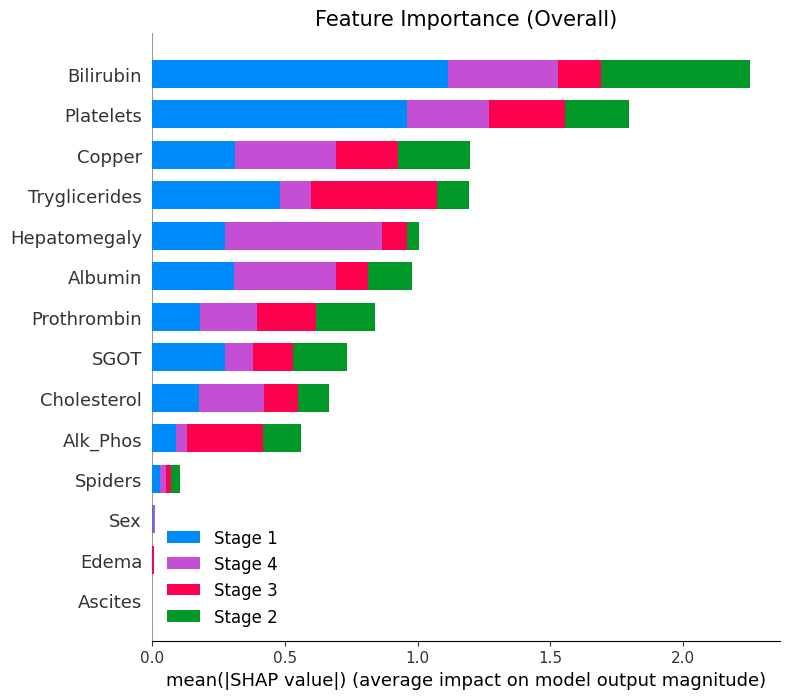

📊 SHAP 데이터 타입: <class 'numpy.ndarray'>
👉 3차원 배열 형태 감지 (Shape: (84, 14, 4))


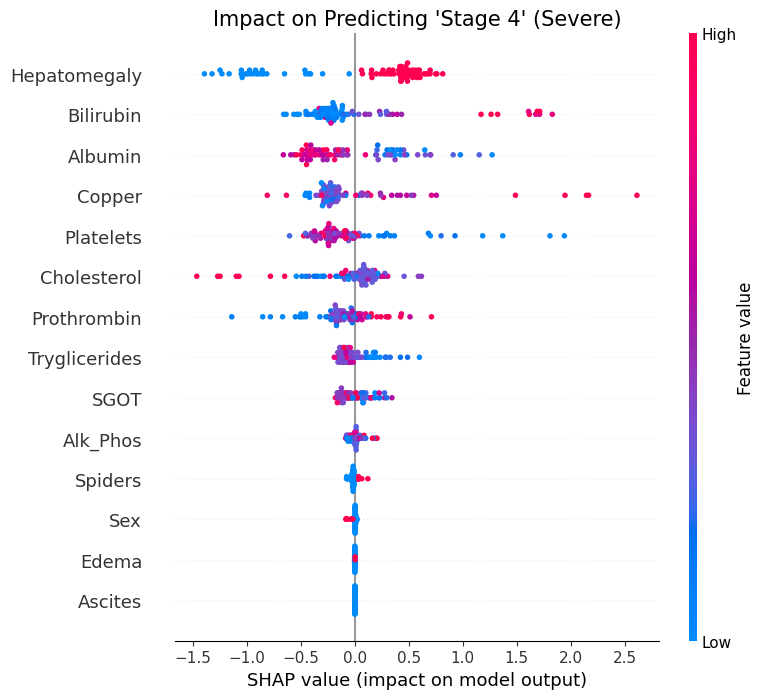

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier # Extra Trees 추가from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier # LightGBM 추가

# 평가 및 설명 라이브러리
from sklearn.metrics import accuracy_score, classification_report
import shap


# .values를 사용하여 데이터 타입(Series/Array) 상관없이 안전하게 최솟값 확인
if np.min(y_train_res.values) == 1:
    print("✅ 라벨을 0~3 범위로 조정합니다 (1씩 차감).")
    y_train_res = y_train_res.astype(int) - 1
    y_test = y_test.astype(int) - 1
else:
    print("✅ 라벨이 이미 0부터 시작하거나 조정되어 있습니다.")
# 학습할 모델
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000, random_state=42),
    
    # [추천] Extra Trees: 랜덤 포레스트보다 빠르고 성능이 좋습니다. (설치 불필요)
    "LightGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1),
    
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    
    "XGBoost": XGBClassifier(
        n_estimators=100, 
        learning_rate=0.1, 
        max_depth=5, 
        random_state=42, 
        eval_metric='mlogloss',
        use_label_encoder=False
    )
}

# 모델 학습 및 정확도 비교
print("\n" + "="*40)
print(f"{'Model':<20} | {'Accuracy':<10}")
print("="*40)

trained_models = {}

for name, model in models.items():
    try:
        model.fit(X_train_res, y_train_res)
        pred = model.predict(X_test)
        acc = accuracy_score(y_test, pred)
        print(f"{name:<20} | {acc:.4f}")
        trained_models[name] = model
    except Exception as e:
        print(f"{name:<20} | Error: {e}")

print("-" * 40)

# 3. XGBoost 상세 평가 결과
print("\n🔍 XGBoost 상세 평가 보고서:")
best_model = trained_models['XGBoost']
xgb_pred = best_model.predict(X_test)
print(classification_report(y_test, xgb_pred))

# 4. SHAP 시각화
print("\n📊 SHAP 해석 (XGBoost Model):")
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# (1) 전체 변수 중요도 (Bar Plot)
plt.figure()
plt.title("Feature Importance (Overall)", fontsize=15)
# plot_type='bar'는 형태가 달라도 보통 잘 작동합니다.
shap.summary_plot(shap_values, X_test, plot_type="bar", 
                  class_names=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], show=False)
plt.show()

# (2) Stage 4 영향력 분석 (형태 감지 로직 추가됨)
print(f"📊 SHAP 데이터 타입: {type(shap_values)}")
target_class_idx = 3 # Stage 4

if isinstance(shap_values, list):
    # (구버전) 리스트 형태 -> [Stage1, Stage2, Stage3, Stage4]
    print(f"👉 리스트 형태 감지 (길이: {len(shap_values)})")
    if len(shap_values) > target_class_idx:
        values_to_plot = shap_values[target_class_idx]
    else:
        values_to_plot = shap_values # 예외 처리
        
elif hasattr(shap_values, 'shape') and len(shap_values.shape) == 3:
    # (신버전) 3차원 배열 형태 -> (샘플 수, 변수 수, 클래스 수)
    print(f"👉 3차원 배열 형태 감지 (Shape: {shap_values.shape})")
    values_to_plot = shap_values[:, :, target_class_idx]
    
else:
    # 이진 분류거나 2차원 배열인 경우 그대로 사용
    print("👉 2차원 배열 형태 감지")
    values_to_plot = shap_values

# 그래프 그리기
plt.figure()
plt.title("Impact on Predicting 'Stage 4' (Severe)", fontsize=15)
shap.summary_plot(values_to_plot, X_test, show=False)
plt.show()

✅ 라벨이 이미 0부터 시작하거나 조정되어 있습니다.

🔥 [SMOTE 데이터] 모델별 튜닝 및 교차 검증 진행 중...
Model                | Mean CV Score   | Std Dev
------------------------------------------------------------
Logistic Regression  | 0.5757          | ±0.0339
Random Forest        | 0.7385          | ±0.0523
LightGBM             | 0.7346          | ±0.0375
XGBoost              | 0.7249          | ±0.0304
🏆 최종 1등 모델: Random Forest (CV Score: 0.7385)


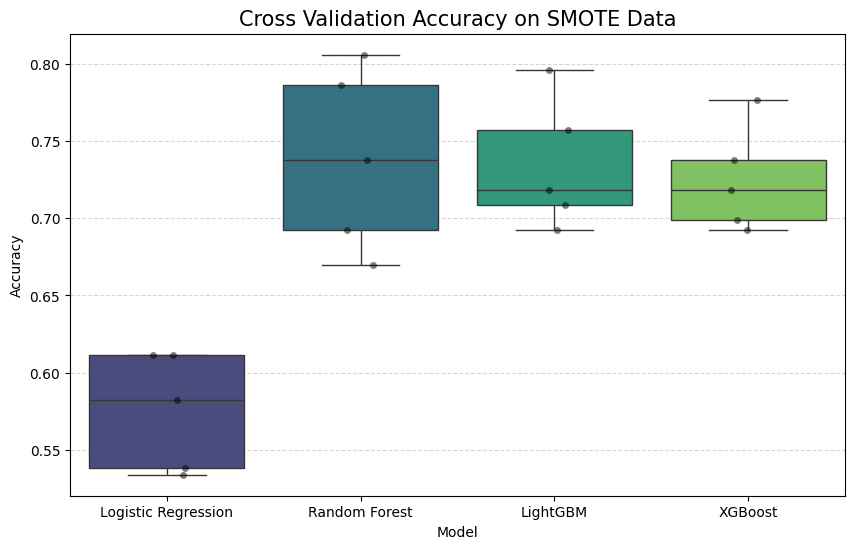


🔍 [Random Forest] 최종 테스트셋(Real World Data) 상세 보고서:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.32      0.42      0.36        19
           2       0.55      0.50      0.52        32
           3       0.81      0.72      0.76        29

    accuracy                           0.54        84
   macro avg       0.42      0.41      0.41        84
weighted avg       0.56      0.54      0.55        84


📊 [Random Forest] SHAP 분석 시작...


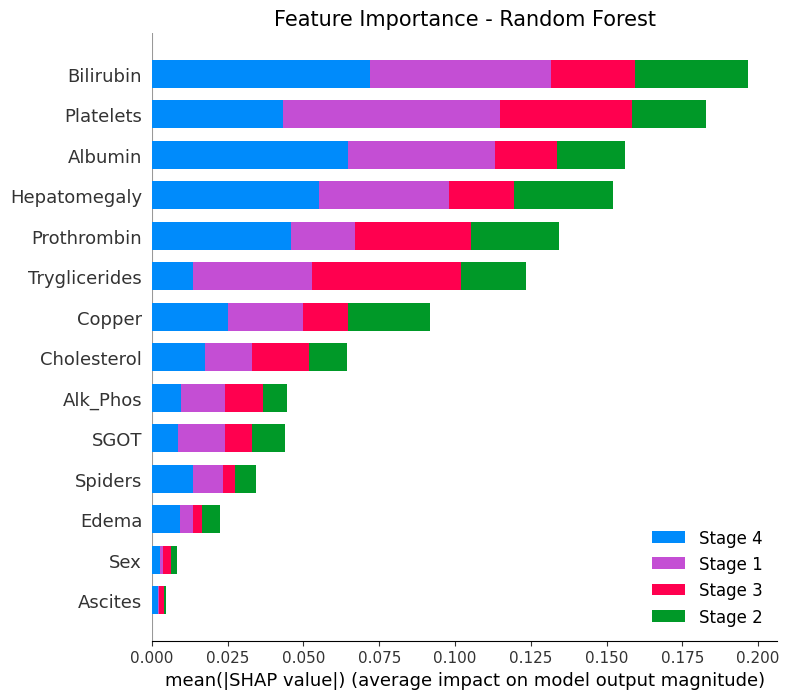

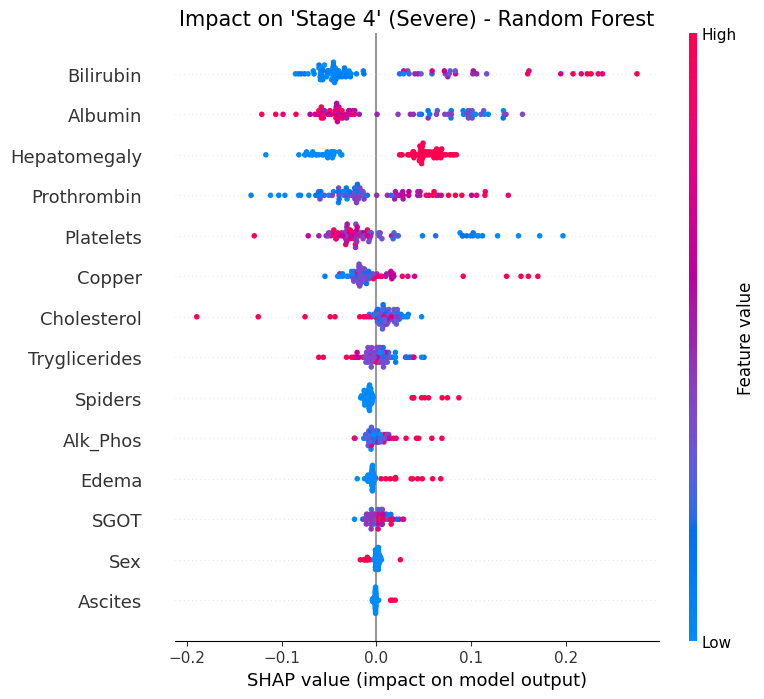

In [81]:
if np.min(y_train_res) == 1:
    print("✅ 라벨을 0~3 범위로 조정합니다 (1씩 차감).")
    y_train_res = y_train_res.astype(int) - 1
    y_test = y_test.astype(int) - 1
else:
    print("✅ 라벨이 이미 0부터 시작하거나 조정되어 있습니다.")

# ---------------------------------------------------------
# 2. 하이퍼파라미터 그리드 (SMOTE 데이터용)
# ---------------------------------------------------------
param_grids = {
    "Logistic Regression": {
        'model': LogisticRegression(random_state=42, max_iter=3000),
        'params': {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
    },
    "Random Forest": {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [100, 200], 'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2]}
    },
    "LightGBM": {
            'model': LGBMClassifier(random_state=42, verbose=-1), # verbose=-1: 불필요한 경고 끄기
            'params': {
                'n_estimators': [100, 200], 
                'learning_rate': [0.05, 0.1], 
                'max_depth': [3, 5, 10]
            }
        },
    "XGBoost": {
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
    }
}

# ---------------------------------------------------------
# 3. GridSearch & Cross Validation (Training Data: X_train_res)
# ---------------------------------------------------------
results_list = []      
best_models = {}       
final_best_score = 0
final_best_name = ""

print("\n🔥 [SMOTE 데이터] 모델별 튜닝 및 교차 검증 진행 중...")
print("="*60)
print(f"{'Model':<20} | {'Mean CV Score':<15} | {'Std Dev'}")
print("-" * 60)

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, config in param_grids.items():
    try:
        # 1) Grid Search (증강 데이터로 학습)
        grid = GridSearchCV(config['model'], config['params'], cv=cv_strategy, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train_res, y_train_res)
        
        # 2) 최적 모델 저장
        best_model = grid.best_estimator_
        best_models[name] = best_model
        
        # 3) CV 점수 확인
        cv_scores = cross_val_score(best_model, X_train_res, y_train_res, cv=cv_strategy, scoring='accuracy')
        
        mean_score = cv_scores.mean()
        std_score = cv_scores.std()
        print(f"{name:<20} | {mean_score:.4f}          | ±{std_score:.4f}")
        
        for score in cv_scores:
            results_list.append({'Model': name, 'CV Accuracy': score})
            
        if mean_score > final_best_score:
            final_best_score = mean_score
            final_best_name = name
            
    except Exception as e:
        print(f"{name:<20} | Error: {e}")

print("="*60)
print(f"🏆 최종 1등 모델: {final_best_name} (CV Score: {final_best_score:.4f})")

# ---------------------------------------------------------
# 4. 교차 검증 결과 시각화
# ---------------------------------------------------------
results_df = pd.DataFrame(results_list)

plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, x='Model', y='CV Accuracy', palette='viridis')
sns.stripplot(data=results_df, x='Model', y='CV Accuracy', color='black', alpha=0.5, jitter=True)
plt.title('Cross Validation Accuracy on SMOTE Data', fontsize=15)
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# ---------------------------------------------------------
# 5. [중요] 원본 테스트셋(Test Set) 최종 평가
# ---------------------------------------------------------
print(f"\n🔍 [{final_best_name}] 최종 테스트셋(Real World Data) 상세 보고서:")
final_model = best_models[final_best_name]
final_pred = final_model.predict(X_test)
print(classification_report(y_test, final_pred))

# ---------------------------------------------------------
# 6. SHAP 분석 (Real Test Set 기준)
# ---------------------------------------------------------
print(f"\n📊 [{final_best_name}] SHAP 분석 시작...")

if final_best_name in ["Random Forest", "XGBoost"]:
    explainer = shap.TreeExplainer(final_model)
    shap_values = explainer.shap_values(X_test)
else:
    # SVM, LR (속도 위해 샘플링 사용)
    X_train_summary = shap.kmeans(X_train_res, 50) 
    explainer = shap.KernelExplainer(final_model.predict_proba, X_train_summary)
    shap_values = explainer.shap_values(X_test)

# (1) 전체 변수 중요도
plt.figure()
plt.title(f"Feature Importance - {final_best_name}", fontsize=15)
shap.summary_plot(shap_values, X_test, plot_type="bar", 
                  class_names=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], show=False)
plt.show()

# (2) Stage 4 영향력 분석 (자동 형태 감지)
target_class_idx = 3

if isinstance(shap_values, list):
    if len(shap_values) > target_class_idx:
        values_to_plot = shap_values[target_class_idx]
    else:
        values_to_plot = shap_values
elif hasattr(shap_values, 'shape') and len(shap_values.shape) == 3:
    values_to_plot = shap_values[:, :, target_class_idx]
else:
    values_to_plot = shap_values

plt.figure()
plt.title(f"Impact on 'Stage 4' (Severe) - {final_best_name}", fontsize=15)
shap.summary_plot(values_to_plot, X_test, show=False)
plt.show()

# Logistic 

In [149]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score




# 반복 횟수 및 성능 저장 리스트 초기화
num_iterations = 10
accuracy_scores = []
f1_scores = []
auroc_scores = []

# StratifiedKFold 설정
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# 로지스틱 회귀 모델 생성
log_model = LogisticRegression(max_iter=5000, solver='lbfgs')

def training(train_index, test_index, fold_no):
    X_train = X[train_index]
    y_train = y.iloc[train_index]
    X_test = X[test_index]
    y_test = y.iloc[test_index]
    
    log_model.fit(X_train, y_train)
    
    y_pred_test = log_model.predict(X_test)
    y_prob_test = log_model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    auroc = roc_auc_score(y_test, y_prob_test)
    
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    auroc_scores.append(auroc)
    
    print(f'For Fold {fold_no} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, AUROC: {auroc:.4f}')

fold_no = 1
for train_index, test_index in skf.split(X, y):
    training(train_index, test_index, fold_no)
    fold_no += 1

# 평균 성능 계산
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_auroc = np.mean(auroc_scores)
std_auroc = np.std(auroc_scores)

print("\nLogistic Regression Model Performance over 10 Folds:")
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
print(f"Mean AUROC: {mean_auroc:.4f} ± {std_auroc:.4f}")


KeyError: "None of [Index([  0,   2,   3,   4,   5,   7,   8,   9,  10,  12,\n       ...\n       407, 408, 409, 410, 412, 413, 414, 415, 416, 417],\n      dtype='int64', length=376)] are in the [columns]"

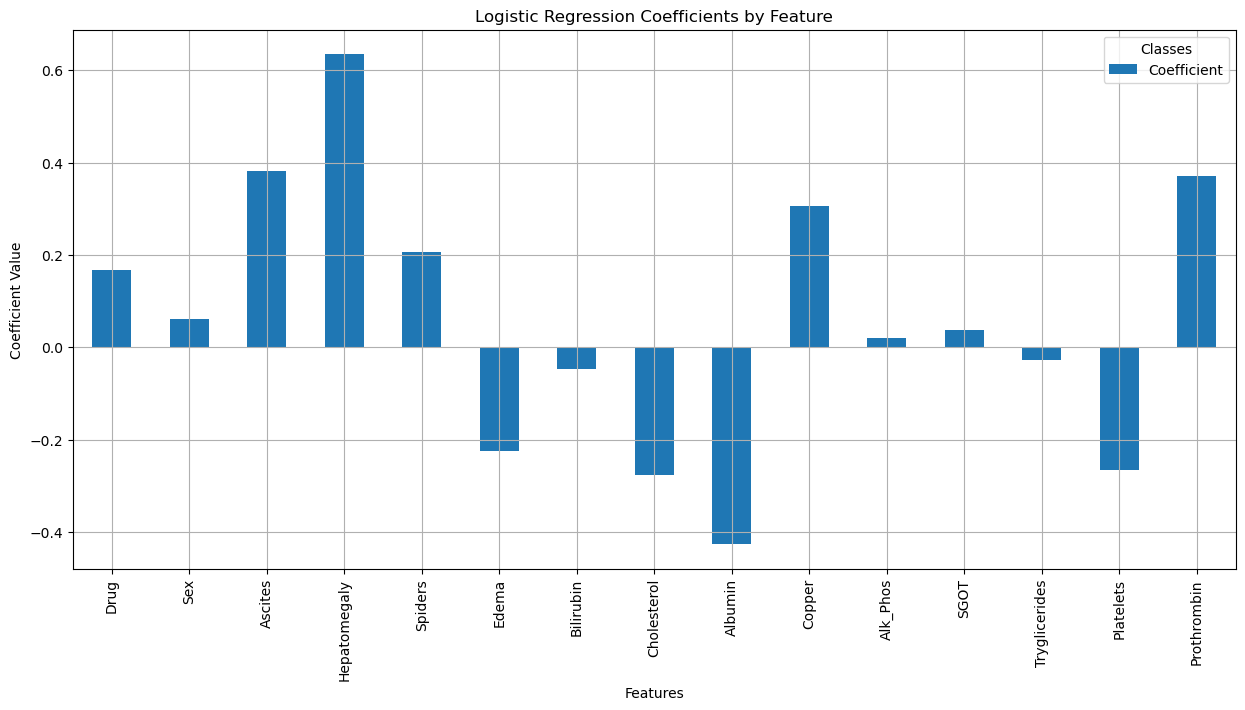

In [22]:
coefficients = log_model.coef_[0]

# # 계수 시각화를 위한 데이터프레임 생성
coefficients_df = pd.DataFrame(coefficients.T, index=X.columns,columns=['Coefficient'])
coefficients_df
# 계수 시각화
coefficients_df.plot(kind='bar', figsize=(15, 7))
plt.title('Logistic Regression Coefficients by Feature')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend(title='Classes')
plt.grid(True)
plt.show()

# 나이브베이즈

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix


# 독립 변수(X) 설정 (Status, N_Days, Stage 제외)
X = df.drop(['Status', 'N_Days', 'Stage','Age'], axis=1)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 종속 변수(y) 설정
y = df['Stage']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 나이브 베이즈 모델 생성 및 학습
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 예측 수행
y_pred_train = nb_model.predict(X_train)
y_pred_test = nb_model.predict(X_test)

# 훈련 세트 평가
print("\nNaive Bayes Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_pred_train))
print("\nNaive Bayes Classification Report (Train):")
print(classification_report(y_train, y_pred_train))

# 테스트 세트 평가
print("\nNaive Bayes Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test))
print("\nNaive Bayes Classification Report (Test):")
print(classification_report(y_test, y_pred_test))



Naive Bayes Confusion Matrix (Train):
[[199  20]
 [ 64  51]]

Naive Bayes Classification Report (Train):
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       219
           1       0.72      0.44      0.55       115

    accuracy                           0.75       334
   macro avg       0.74      0.68      0.69       334
weighted avg       0.74      0.75      0.73       334


Naive Bayes Confusion Matrix (Test):
[[43 12]
 [18 11]]

Naive Bayes Classification Report (Test):
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        55
           1       0.48      0.38      0.42        29

    accuracy                           0.64        84
   macro avg       0.59      0.58      0.58        84
weighted avg       0.63      0.64      0.63        84



In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score

# 독립 변수(X) 설정 (Status, N_Days, Stage, Age 제외)
X = df.drop(['Status', 'N_Days', 'Stage', 'Age'], axis=1)
y = df['Stage']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# StratifiedKFold 설정
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 반복 횟수 및 성능 저장 리스트 초기화
accuracy_scores = []
f1_scores = []
auroc_scores = []

def training(train_index, test_index, fold_no):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 나이브 베이즈 모델 생성 및 학습
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    
    # 테스트 세트 예측
    y_pred_test = nb_model.predict(X_test)
    y_prob_test = nb_model.predict_proba(X_test)[:, 1]
    
    # 성능 평가 (정확도, F1 스코어, AUROC)
    accuracy = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    auroc = roc_auc_score(y_test, y_prob_test)
    
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    auroc_scores.append(auroc)
    
    # 각 반복의 결과 출력
    print(f"For Fold {fold_no} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, AUROC: {auroc:.4f}")

fold_no = 1
for train_index, test_index in stratified_kfold.split(X_scaled, y):
    training(train_index, test_index, fold_no)
    fold_no += 1

# 평균 성능 계산
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_auroc = np.mean(auroc_scores)
std_auroc = np.std(auroc_scores)

print("\nNaive Bayes Model Performance over 10 Folds:")
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
print(f"Mean AUROC: {mean_auroc:.4f} ± {std_auroc:.4f}")

For Fold 1 - Accuracy: 0.7143, F1 Score: 0.5000, AUROC: 0.7802
For Fold 2 - Accuracy: 0.6905, F1 Score: 0.4348, AUROC: 0.7679
For Fold 3 - Accuracy: 0.7619, F1 Score: 0.6429, AUROC: 0.8296
For Fold 4 - Accuracy: 0.5476, F1 Score: 0.0952, AUROC: 0.5654
For Fold 5 - Accuracy: 0.7381, F1 Score: 0.5926, AUROC: 0.7321
For Fold 6 - Accuracy: 0.7381, F1 Score: 0.5600, AUROC: 0.7602
For Fold 7 - Accuracy: 0.8333, F1 Score: 0.7407, AUROC: 0.9056
For Fold 8 - Accuracy: 0.6905, F1 Score: 0.3810, AUROC: 0.7041
For Fold 9 - Accuracy: 0.7317, F1 Score: 0.5217, AUROC: 0.7063
For Fold 10 - Accuracy: 0.7317, F1 Score: 0.5217, AUROC: 0.8042

Naive Bayes Model Performance over 10 Folds:
Mean Accuracy: 0.7178 ± 0.0685
Mean F1 Score: 0.4991 ± 0.1654
Mean AUROC: 0.7556 ± 0.0854


# KNN


KNN Confusion Matrix (Train):
[[198  21]
 [ 38  77]]

KNN Classification Report (Train):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       219
           1       0.79      0.67      0.72       115

    accuracy                           0.82       334
   macro avg       0.81      0.79      0.80       334
weighted avg       0.82      0.82      0.82       334


KNN Confusion Matrix (Test):
[[45 10]
 [13 16]]

KNN Classification Report (Test):
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        55
           1       0.62      0.55      0.58        29

    accuracy                           0.73        84
   macro avg       0.70      0.68      0.69        84
weighted avg       0.72      0.73      0.72        84



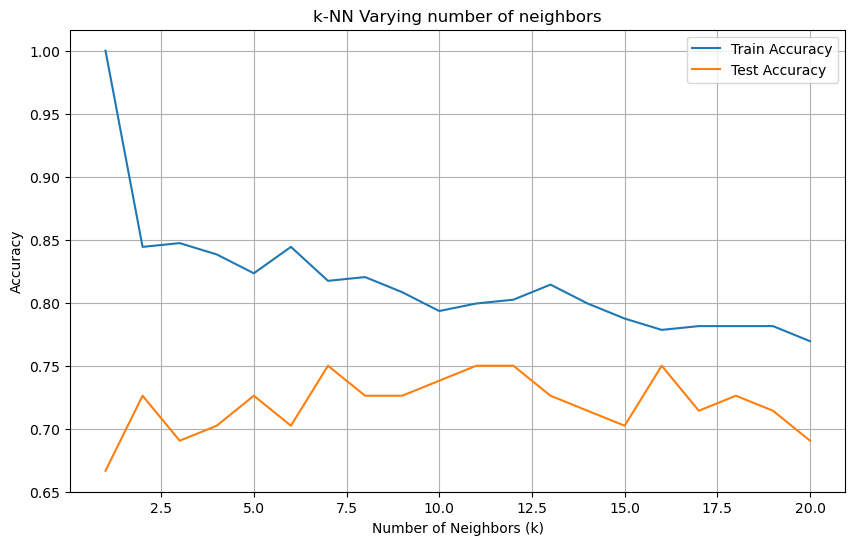

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 독립 변수(X) 설정 (Status, N_Days, Stage 제외)
X = df.drop(['Status', 'N_Days', 'Stage','Age'], axis=1)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 종속 변수(y) 설정
y = df['Stage']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# KNN 모델 생성 및 학습
knn_model = KNeighborsClassifier(n_neighbors=5)  # k 값을 5로 설정
knn_model.fit(X_train, y_train)

# 예측 수행
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

# 훈련 세트 평가
print("\nKNN Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_pred_train))
print("\nKNN Classification Report (Train):")
print(classification_report(y_train, y_pred_train))

# 테스트 세트 평가
print("\nKNN Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test))
print("\nKNN Classification Report (Test):")
print(classification_report(y_test, y_pred_test))

# k 값에 따른 정확도 시각화
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    train_accuracies.append(knn_model.score(X_train, y_train))
    test_accuracies.append(knn_model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Varying number of neighbors')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

## 독립 변수(X) 설정 (Status, N_Days, Stage 제외)
X = df.drop(['Status', 'N_Days', 'Stage', 'Age'], axis=1)
y = df['Stage']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# StratifiedKFold 설정
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 반복 횟수 및 성능 저장 리스트 초기화
accuracy_scores = []
f1_scores = []
auroc_scores = []

def training(train_index, test_index, fold_no):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # KNN 모델 생성 및 학습
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    
    # 테스트 세트 예측
    y_pred_test = knn_model.predict(X_test)
    y_prob_test = knn_model.predict_proba(X_test)[:, 1]
    
    # 성능 평가 (정확도, F1 스코어, AUROC)
    accuracy = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)  # 다중 클래스에서의 F1 스코어
    auroc = roc_auc_score(y_test, y_prob_test)  # 다중 클래스에서의 AUROC
    
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    auroc_scores.append(auroc)
    
    # 각 반복의 결과 출력
    print(f"For Fold {fold_no} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, AUROC: {auroc:.4f}")

fold_no = 1
for train_index, test_index in stratified_kfold.split(X_scaled, y):
    training(train_index, test_index, fold_no)
    fold_no += 1

# 평균 성능 계산
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_auroc = np.mean(auroc_scores)
std_auroc = np.std(auroc_scores)

print("\nKNN Model Performance over 10 Folds:")
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
print(f"Mean AUROC: {mean_auroc:.4f} ± {std_auroc:.4f}")

For Fold 1 - Accuracy: 0.7143, F1 Score: 0.5385, AUROC: 0.7111
For Fold 2 - Accuracy: 0.8333, F1 Score: 0.7200, AUROC: 0.8630
For Fold 3 - Accuracy: 0.7857, F1 Score: 0.6897, AUROC: 0.8432
For Fold 4 - Accuracy: 0.6429, F1 Score: 0.4444, AUROC: 0.5901
For Fold 5 - Accuracy: 0.7619, F1 Score: 0.6875, AUROC: 0.7819
For Fold 6 - Accuracy: 0.7143, F1 Score: 0.5714, AUROC: 0.7423
For Fold 7 - Accuracy: 0.8333, F1 Score: 0.7586, AUROC: 0.8546
For Fold 8 - Accuracy: 0.7381, F1 Score: 0.5217, AUROC: 0.7232
For Fold 9 - Accuracy: 0.8537, F1 Score: 0.7692, AUROC: 0.8016
For Fold 10 - Accuracy: 0.6585, F1 Score: 0.5000, AUROC: 0.6878

KNN Model Performance over 10 Folds:
Mean Accuracy: 0.7536 ± 0.0696
Mean F1 Score: 0.6201 ± 0.1117
Mean AUROC: 0.7599 ± 0.0817


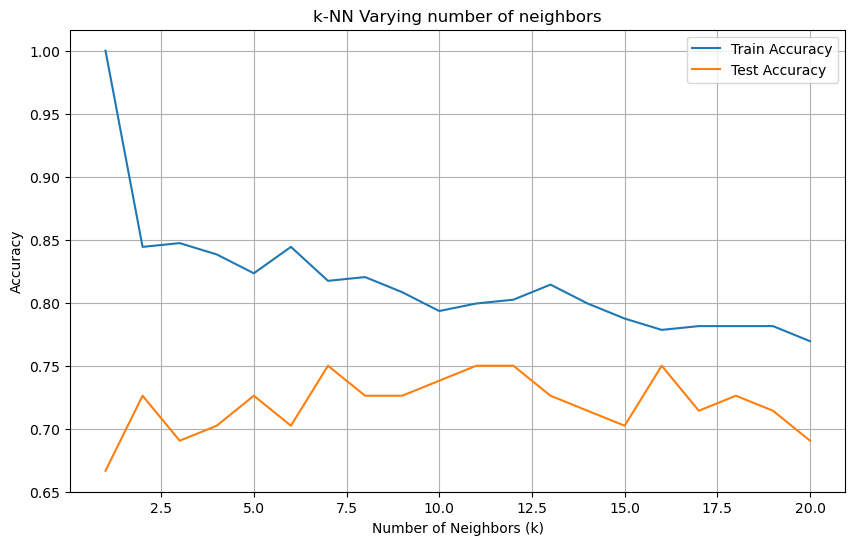

In [27]:
# k 값에 따른 정확도 시각화
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    train_accuracies.append(knn_model.score(X_train, y_train))
    test_accuracies.append(knn_model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Varying number of neighbors')
plt.legend()
plt.grid(True)
plt.show()

# Decision Tree



Decision Tree Confusion Matrix (Train):
[[192  27]
 [ 26  89]]

Decision Tree Classification Report (Train):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       219
           1       0.77      0.77      0.77       115

    accuracy                           0.84       334
   macro avg       0.82      0.83      0.82       334
weighted avg       0.84      0.84      0.84       334


Decision Tree Confusion Matrix (Test):
[[38 17]
 [12 17]]

Decision Tree Classification Report (Test):
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        55
           1       0.50      0.59      0.54        29

    accuracy                           0.65        84
   macro avg       0.63      0.64      0.63        84
weighted avg       0.67      0.65      0.66        84



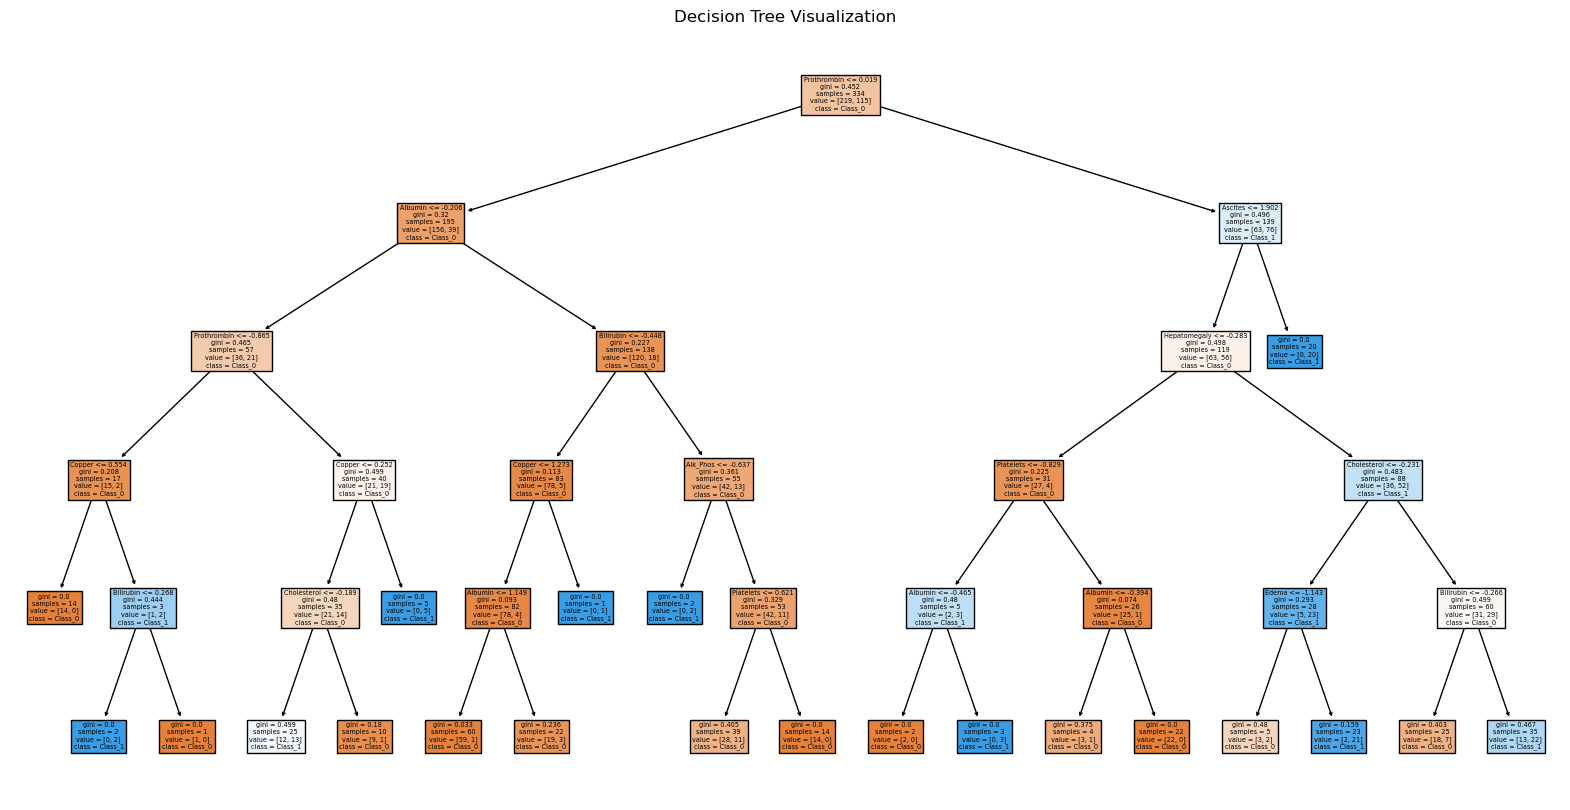

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn import tree

# 독립 변수(X) 설정 (Status, N_Days, Stage 제외)
X = df.drop(['Status', 'N_Days', 'Stage','Age'], axis=1)
y = df['Stage']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 디시전 트리 모델 생성 및 학습
dt_model = DecisionTreeClassifier(random_state=42,max_depth=5)
dt_model.fit(X_train, y_train)

# 예측 수행
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

# 훈련 세트 평가
print("\nDecision Tree Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_pred_train))
print("\nDecision Tree Classification Report (Train):")
print(classification_report(y_train, y_pred_train))

# 테스트 세트 평가
print("\nDecision Tree Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test))
print("\nDecision Tree Classification Report (Test):")
print(classification_report(y_test, y_pred_test))

# 트리 시각화
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['Class_0', 'Class_1'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()


### 모델 평균

In [29]:
X = df.drop(['Status', 'N_Days', 'Stage', 'Age'], axis=1)
y = df['Stage']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# StratifiedKFold 설정
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 반복 횟수 및 성능 저장 리스트 초기화
accuracy_scores = []
f1_scores = []
auroc_scores = []

def training(train_index, test_index, fold_no):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 디시전 트리 모델 생성 및 학습
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    
    # 테스트 세트 예측
    y_pred_test = dt_model.predict(X_test)
    y_prob_test = dt_model.predict_proba(X_test)[:, 1]
    
    # 성능 평가 (정확도, F1 스코어, AUROC)
    accuracy = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)  # 다중 클래스에서의 F1 스코어
    auroc = roc_auc_score(y_test, y_prob_test)  # 다중 클래스에서의 AUROC
    
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    auroc_scores.append(auroc)
    
    # 각 반복의 결과 출력
    print(f"For Fold {fold_no} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, AUROC: {auroc:.4f}")

fold_no = 1
for train_index, test_index in stratified_kfold.split(X_scaled, y):
    training(train_index, test_index, fold_no)
    fold_no += 1

# 평균 성능 계산
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_auroc = np.mean(auroc_scores)
std_auroc = np.std(auroc_scores)

print("\nDecision Tree Model Performance over 10 Folds:")
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
print(f"Mean AUROC: {mean_auroc:.4f} ± {std_auroc:.4f}")

For Fold 1 - Accuracy: 0.5000, F1 Score: 0.3636, AUROC: 0.4778
For Fold 2 - Accuracy: 0.6429, F1 Score: 0.5161, AUROC: 0.6185
For Fold 3 - Accuracy: 0.6905, F1 Score: 0.5185, AUROC: 0.6407
For Fold 4 - Accuracy: 0.6190, F1 Score: 0.3333, AUROC: 0.5407
For Fold 5 - Accuracy: 0.7143, F1 Score: 0.6471, AUROC: 0.7321
For Fold 6 - Accuracy: 0.7143, F1 Score: 0.4545, AUROC: 0.6250
For Fold 7 - Accuracy: 0.7619, F1 Score: 0.6429, AUROC: 0.7321
For Fold 8 - Accuracy: 0.5714, F1 Score: 0.4375, AUROC: 0.5536
For Fold 9 - Accuracy: 0.7073, F1 Score: 0.6000, AUROC: 0.6918
For Fold 10 - Accuracy: 0.6585, F1 Score: 0.5000, AUROC: 0.6204

Decision Tree Model Performance over 10 Folds:
Mean Accuracy: 0.6580 ± 0.0740
Mean F1 Score: 0.5014 ± 0.1025
Mean AUROC: 0.6233 ± 0.0785


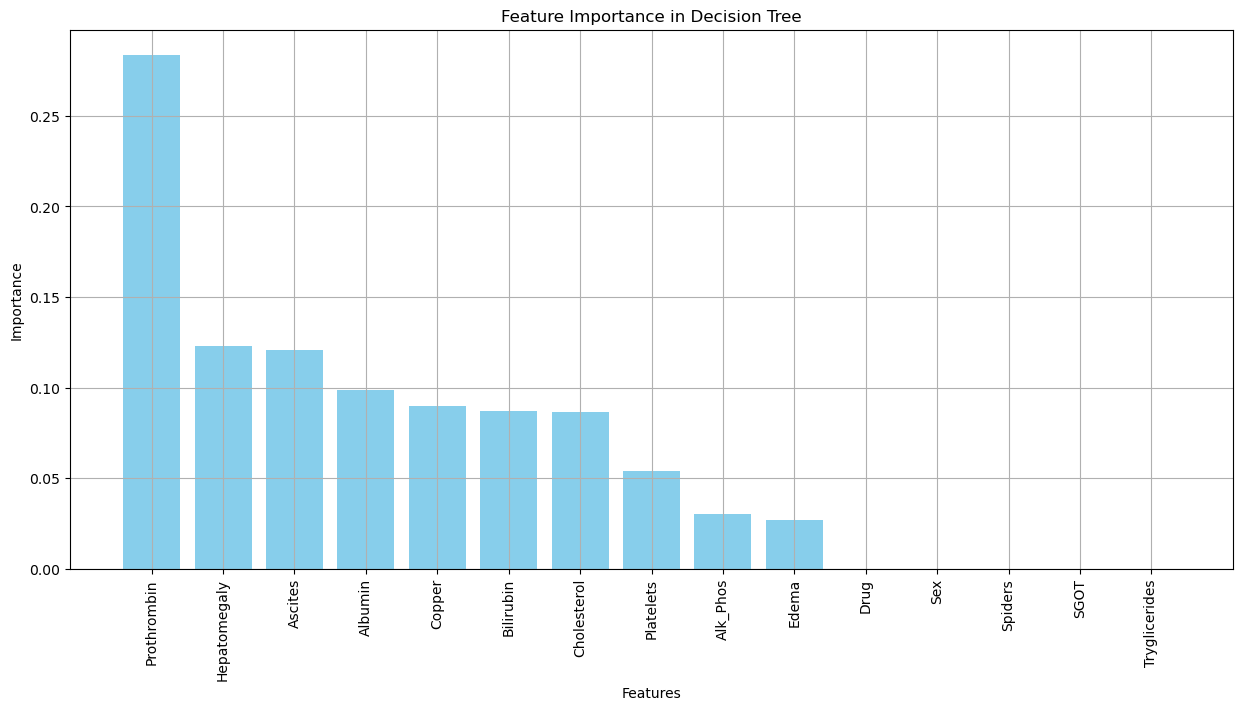

In [30]:
# 변수 중요도 추출 및 시각화
feature_importances = dt_model.feature_importances_
features = X.columns

# 변수 중요도를 데이터프레임으로 정렬
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(15, 7))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Random Forest

In [31]:
from sklearn.preprocessing import StandardScaler
X = df.drop(['Status', 'N_Days','Age'], axis=1)   # 변수 줄이기
y = df['Stage']



In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif


# 독립 변수(X) 설정 (Status, N_Days, Stage, Age 제외)
X = df.drop(['Status', 'N_Days', 'Stage', 'Age'], axis=1)
y = df['Stage']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 반복 횟수 및 성능 저장 리스트 초기화
num_iterations = 10
accuracy_scores = []
f1_scores = []
auroc_scores = []

# StratifiedKFold 설정
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 랜덤 포레스트 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=5)

def training(train_index, test_index, fold_no):
    X_train = X_scaled[train_index]
    y_train = y.iloc[train_index]
    X_test = X_scaled[test_index]
    y_test = y.iloc[test_index]
    
    rf_model.fit(X_train, y_train)
    
    y_pred_test = rf_model.predict(X_test)
    y_prob_test = rf_model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    auroc = roc_auc_score(y_test, y_prob_test)
    
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    auroc_scores.append(auroc)
    
    print(f'For Fold {fold_no} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, AUROC: {auroc:.4f}')

fold_no = 1
for train_index, test_index in stratified_kfold.split(X_scaled, y):
    training(train_index, test_index, fold_no)
    fold_no += 1

# 평균 성능 계산
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_auroc = np.mean(auroc_scores)
std_auroc = np.std(auroc_scores)

print("\nRandom Forest Model Performance over 10 Folds:")
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
print(f"Mean AUROC: {mean_auroc:.4f} ± {std_auroc:.4f}")

# 최종 모델 학습 및 평가
rf_model.fit(X_train, y_train)
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

print("\nRandom Forest Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_pred_train))

print("\nRandom Forest Classification Report (Train):")
print(classification_report(y_train, y_pred_train))

print("\nRandom Forest Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test))

print("\nRandom Forest Classification Report (Test):")
print(classification_report(y_test, y_pred_test))



For Fold 1 - Accuracy: 0.6429, F1 Score: 0.4000, AUROC: 0.7309
For Fold 2 - Accuracy: 0.6905, F1 Score: 0.3158, AUROC: 0.8568
For Fold 3 - Accuracy: 0.7619, F1 Score: 0.5833, AUROC: 0.7926
For Fold 4 - Accuracy: 0.6429, F1 Score: 0.2105, AUROC: 0.6667
For Fold 5 - Accuracy: 0.8095, F1 Score: 0.6923, AUROC: 0.8750
For Fold 6 - Accuracy: 0.7143, F1 Score: 0.5000, AUROC: 0.6760
For Fold 7 - Accuracy: 0.9048, F1 Score: 0.8333, AUROC: 0.9694
For Fold 8 - Accuracy: 0.7381, F1 Score: 0.4762, AUROC: 0.7934
For Fold 9 - Accuracy: 0.8049, F1 Score: 0.6364, AUROC: 0.7857
For Fold 10 - Accuracy: 0.8293, F1 Score: 0.6957, AUROC: 0.8228

Random Forest Model Performance over 10 Folds:
Mean Accuracy: 0.7539 ± 0.0804
Mean F1 Score: 0.5343 ± 0.1812
Mean AUROC: 0.7969 ± 0.0873

Random Forest Confusion Matrix (Train):
[[215   4]
 [ 31  84]]

Random Forest Classification Report (Train):
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       219
           1

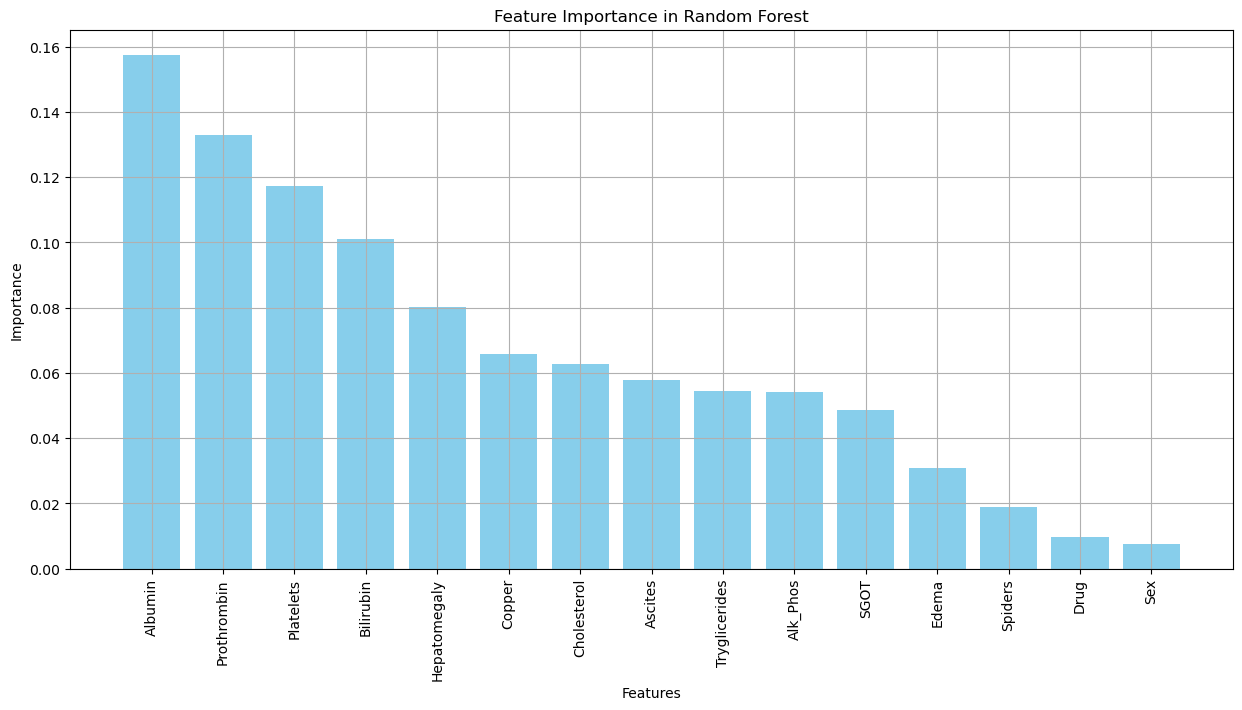

In [33]:
feature_importances = rf_model.feature_importances_
features = X.columns

# 변수 중요도를 데이터프레임으로 정렬
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 중요도 시각화
plt.figure(figsize=(15, 7))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# XGboost

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# 독립 변수(X) 설정 (Status, N_Days, Stage, Age 제외)
X = df.drop(['Status', 'N_Days', 'Stage', 'Age'], axis=1)
y = df['Stage']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# StratifiedKFold 설정
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# XGBoost 모델 생성
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# 반복 횟수 및 성능 저장 리스트 초기화
accuracy_scores = []
f1_scores = []
auroc_scores = []

def training(train_index, test_index, fold_no):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model.fit(X_train, y_train)
    
    y_pred_test = xgb_model.predict(X_test)
    y_prob_test = xgb_model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    auroc = roc_auc_score(y_test, y_prob_test)
    
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    auroc_scores.append(auroc)
    
    print(f"For Fold {fold_no} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}, AUROC: {auroc:.4f}")

fold_no = 1
for train_index, test_index in stratified_kfold.split(X_scaled, y):
    training(train_index, test_index, fold_no)
    fold_no += 1

# 평균 성능 계산
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
mean_auroc = np.mean(auroc_scores)
std_auroc = np.std(auroc_scores)

print("\nXGBoost Model Performance over 10 Folds:")
print(f"Mean Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Mean F1 Score: {mean_f1:.4f} ± {std_f1:.4f}")
print(f"Mean AUROC: {mean_auroc:.4f} ± {std_auroc:.4f}")


For Fold 1 - Accuracy: 0.6667, F1 Score: 0.5333, AUROC: 0.6815
For Fold 2 - Accuracy: 0.7381, F1 Score: 0.5926, AUROC: 0.7951
For Fold 3 - Accuracy: 0.7619, F1 Score: 0.6154, AUROC: 0.7605
For Fold 4 - Accuracy: 0.6905, F1 Score: 0.3810, AUROC: 0.7160
For Fold 5 - Accuracy: 0.7143, F1 Score: 0.6000, AUROC: 0.8520
For Fold 6 - Accuracy: 0.6190, F1 Score: 0.3846, AUROC: 0.6301
For Fold 7 - Accuracy: 0.8571, F1 Score: 0.7857, AUROC: 0.9286
For Fold 8 - Accuracy: 0.7619, F1 Score: 0.5833, AUROC: 0.7474
For Fold 9 - Accuracy: 0.6829, F1 Score: 0.5517, AUROC: 0.7037
For Fold 10 - Accuracy: 0.6829, F1 Score: 0.5806, AUROC: 0.7143

XGBoost Model Performance over 10 Folds:
Mean Accuracy: 0.7175 ± 0.0627
Mean F1 Score: 0.5608 ± 0.1101
Mean AUROC: 0.7529 ± 0.0825


Index(['DrugClass', 'SexClass', 'AscitesClass', 'HepatomegalyClass',
       'SpidersClass', 'EdemaClass', 'BilirubinClass', 'CholesterolClass',
       'AlbuminClass', 'CopperClass', 'Alk_PhosClass', 'SGOTClass',
       'TrygliceridesClass', 'PlateletsClass', 'ProthrombinClass',
       'StageClass'],
      dtype='object')

In [54]:

X = df.drop(['Status', 'N_Days', 'Stage', 'Age'], axis=1)
y = df['Stage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [55]:
X.columns
feature_names=X.columns
class_names=["good","bad"]

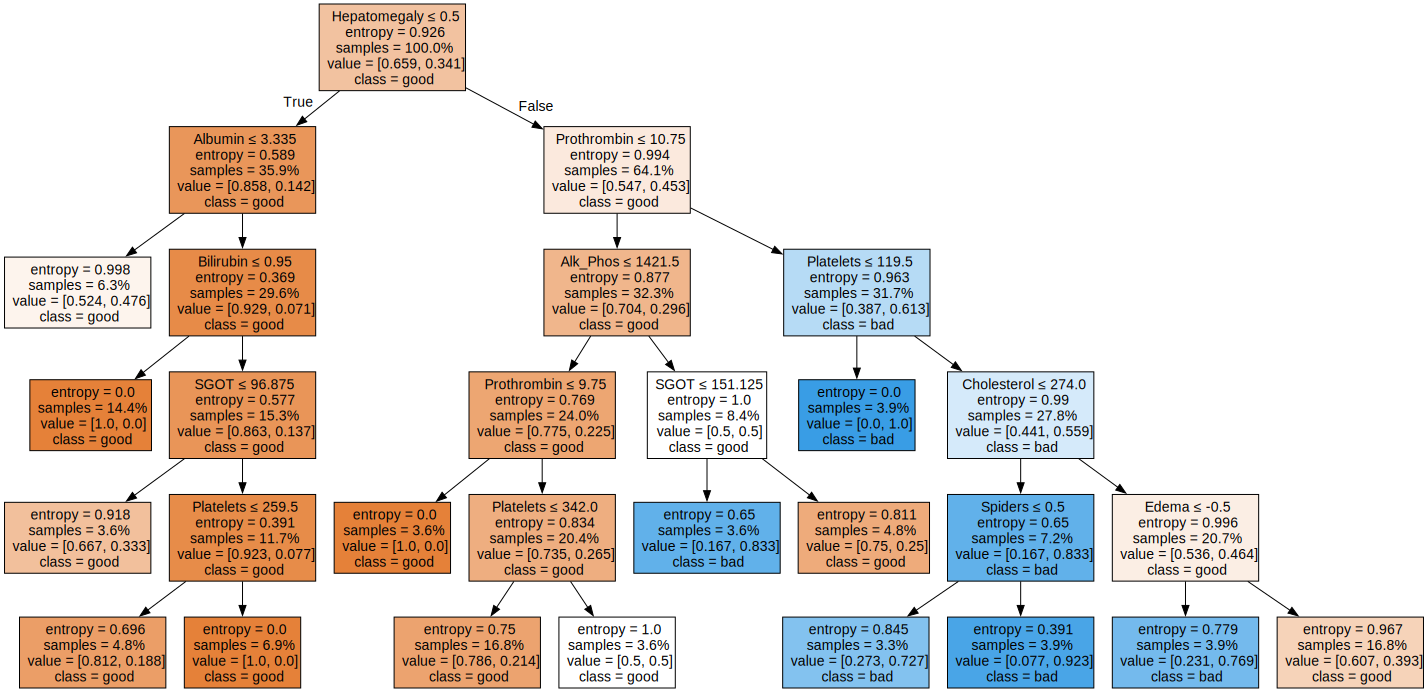

In [56]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Decision tree fitting
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=0.03, max_depth=5, random_state=12)
dt.fit(X_train, y_train)

# Visualization
dot_data = export_graphviz(dt, out_file=None, 
                      feature_names=feature_names,
                      class_names=class_names,  
                      filled=True, rounded=False,
                      proportion=True,
                      special_characters=True)  
visulize_dt = graphviz.Source(dot_data)  
visulize_dt 

In [77]:
# Color DT (Scikit-learn version)

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import display, HTML
from IPython.display import Image
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
import graphviz

class colorDT:
   def __init__(self, model, feature_names, class_names):
       self.clf = model
       self.feature_names = feature_names
       self.class_names = class_names
       self.df_rule_rf = pd.DataFrame(columns=['Rule Type', 'RF Difference', 'Index'])

   def _colorDT(self, pruned=False):
       def _color_brew(n_classes):
           if n_classes == 1:
               colors = [(255, 255, 255)] 
           else:
               color_map = LinearSegmentedColormap.from_list(
                   "tree_colors",
                   [(1.0, 0.6, 0.2), (0.2, 0.6, 1.0)], 
                   N=n_classes)
               colors = [color_map(i / (n_classes - 1)) for i in range(n_classes)]
               colors = [(int(r * 255), int(g * 255), int(b * 255)) for r, g, b, _ in colors]
           return colors

       def make_col(tree, node):
           values = tree.value[node][0]
           if tree.n_classes[0] == 1:
               color = (255, 255, 255)
               alpha = (values.item() - tree.value.min()) / (tree.value.max() - tree.value.min())
           else:
               color = _color_brew(tree.n_classes[0])[np.argmax(values)]
               sorted_values = sorted(values, reverse=True)
               if len(sorted_values) == 1:
                   alpha = 0.0
               else:
                   alpha = (sorted_values[0] - sorted_values[1]) / (sorted_values[0] + 1e-7)
           color = [int(round(alpha * c + (1 - alpha) * 255, 0)) for c in color]
           return "#%02x%02x%02x" % tuple(color)

       def make_col_edge(tree, node, child_index):
           parent_value = tree.value[node][0][0] / sum(tree.value[node][0])
           child_value = tree.value[child_index][0][0] / sum(tree.value[child_index][0])

           return "#FF6600" if child_value > parent_value else "#4169E1"

       tree = graphviz.Digraph(format='png')
       tree.attr(dpi='300')
       tree.attr(rankdir='TB')
       nodes = np.arange(self.clf.tree_.node_count)

       if pruned:
           self._prune_homogeneous_subtrees(nodes)

       for i in nodes:
           has_parent = any(i == self.clf.tree_.children_left[j] or i == self.clf.tree_.children_right[j] for j in nodes)
           if has_parent or self.clf.tree_.children_left[i] != -1 or self.clf.tree_.children_right[i] != -1:
            if self.clf.tree_.children_left[i] == -1 and self.clf.tree_.children_right[i] == -1:
                predicted_class = self.class_names[np.argmax(self.clf.tree_.value[i])]
                info = f'impurity={round(self.clf.tree_.impurity[i], 3)}\n RF=[{round(self.clf.tree_.value[i][0][0]/self.clf.tree_.n_node_samples[i],3)}, {round(self.clf.tree_.value[i][0][1]/self.clf.tree_.n_node_samples[i],3)}]'
                node_label = f'class={predicted_class}\n{info}'
                node_shape = 'box'
                node_width = '0.7'
                node_height = '0.4'
            else:
                condition = f'{self.feature_names[self.clf.tree_.feature[i]]} <= {round(self.clf.tree_.threshold[i], 3)}'
                info = f'impurity={round(self.clf.tree_.impurity[i], 3)}\n RF=[{round(self.clf.tree_.value[i][0][0]/self.clf.tree_.n_node_samples[i],3)}, {round(self.clf.tree_.value[i][0][1]/self.clf.tree_.n_node_samples[i],3)}]'
                node_label = f'{condition}\n{info}'
                node_shape = 'box'
                node_width = '0.75'
                node_height = '0.5'

            tree.node(str(i), label=node_label, fillcolor=make_col(self.clf.tree_, i),
                        shape=node_shape, style='filled', width=node_width,
                        height=node_height, color='black', fontname="helvetica")

            for child in [self.clf.tree_.children_left[i], self.clf.tree_.children_right[i]]:
                if child != -1:
                    edge_color = make_col_edge(self.clf.tree_, i, child)
                    tree.edge(str(i), str(child), color=edge_color, penwidth='1')
                    if self.clf.tree_.impurity[child] < self.clf.tree_.impurity[i]:
                        tree.edge(str(i), str(child), color=edge_color, penwidth='1')
                    else:
                        tree.edge(str(i), str(child), color=edge_color, penwidth='0', style='invis')

       return tree

   def _calculate_rule_rf(self, rule, X, y, class_name):
       rule_conditions = rule.split("IF ")[1].split(" THEN")[0].split(" and ")
       rule_matches = np.ones(len(X), dtype=bool)
       for condition in rule_conditions:
           feature, operator, value = condition.split(" ")
        #    try:
           print(feature)
           print(self.feature_names)
           feature_idx = self.feature_names.index(feature)
        #    except AttributeError as error:
           value = float(value)

           if operator == "<=":
               rule_matches &= (X[:, feature_idx] <= value)
           else:
               rule_matches &= (X[:, feature_idx] > value)

       class_idx = self.class_names.index(class_name)
       class_value = np.sort(np.unique(y))[class_idx]
       rule_class_count = np.sum(y[rule_matches] == class_value)
       rule_total_count = np.sum(rule_matches)
       rule_rf = rule_class_count / rule_total_count if rule_total_count > 0 else 0.0

       return rule_rf

   def classify_rules(self, X, y):
    n_nodes = self.clf.tree_.node_count
    children_left = self.clf.tree_.children_left
    children_right = self.clf.tree_.children_right
    feature = self.clf.tree_.feature
    threshold = self.clf.tree_.threshold
    values = self.clf.tree_.value
    
    self.rules_str = ""

    def recurse(node, path, rule):
        if feature[node] != -2:
            name = self.feature_names[feature[node]]
            threshold_value = threshold[node]
            path.append((name, threshold_value, node))
            rule.append(f"{name} <= {threshold_value}")
            recurse(children_left[node], path, rule)
            rule.pop()
            rule.append(f"{name} > {threshold_value}")
            recurse(children_right[node], path, rule)
            rule.pop()
            path.pop()
        else:
            class_idx = values[node].argmax()
            class_name = self.class_names[class_idx]
            class_count = values[node].flatten()[class_idx]
            total_count = values[node].sum()
            rf = class_count / total_count

            irrelevant_conditions = []
            max_rf_node = None
            max_rf = -1
            rule_type = "Type 1"

            previous_rf = rf
            for name, threshold_value, parent_node in reversed(path):
                parent_class_count = values[parent_node].flatten()[class_idx]
                parent_total_count = values[parent_node].sum()
                parent_rf = parent_class_count / parent_total_count
                if parent_rf > max_rf:
                    max_rf = parent_rf
                    max_rf_node = parent_node
                if parent_rf > previous_rf:
                    irrelevant_conditions.append((name, threshold_value, parent_node))
                previous_rf = parent_rf
            if max_rf > rf:
                rule_type = "Type 2"
            
            original_rule_str = f"IF {' and '.join(rule)} THEN class = {class_name}"
            original_rule_rf = self._calculate_rule_rf(original_rule_str, X, y, class_name)

            if rule_type == "Type 1":
                self.rules_str += "Rule (Type 1)\n" 
                self.rules_str += "Original Rule:\n" 
                self.rules_str += f"{original_rule_str} (RF: {round(original_rule_rf,3)})\n"
                if irrelevant_conditions:
                    modified_rule = [r for r in rule if not any(r.startswith(condition[0]) and r.endswith(str(condition[1])) for condition in irrelevant_conditions)]
                    modified_rule_str = f"IF {' and '.join(modified_rule)} THEN class = {class_name}"
                    modified_rule_rf = self._calculate_rule_rf(modified_rule_str, X, y, class_name)                    
                    rf_difference = abs(original_rule_rf - modified_rule_rf)
                    self.df_rule_rf = pd.concat([self.df_rule_rf, pd.DataFrame({'Rule Type': 'Type 1-y', 'RF Difference': rf_difference, 'Index': len(self.df_rule_rf)}, index=[len(self.df_rule_rf)])], ignore_index=True)                
                else:
                    modified_rule_str = original_rule_str
                    modified_rule_rf = original_rule_rf                    
                    rf_difference = abs(original_rule_rf - modified_rule_rf)
                    self.df_rule_rf = pd.concat([self.df_rule_rf, pd.DataFrame({'Rule Type': 'Type 1-n', 'RF Difference': rf_difference, 'Index': len(self.df_rule_rf)}, index=[len(self.df_rule_rf)])], ignore_index=True)
                self.rules_str += "Compact Rule:\n"
                self.rules_str += f"{modified_rule_str} (RF: {round(modified_rule_rf,3)})\n" 
            else:
                self.rules_str += "Rule (Type 2)\n"
                self.rules_str += "Original Rule:\n"
                self.rules_str += f"{original_rule_str} (RF: {round(original_rule_rf,3)})\n"
                if irrelevant_conditions:
                    modified_rule_1 = [r for r in rule if not any(r.startswith(condition[0]) and r.endswith(str(condition[1])) for condition in irrelevant_conditions)]
                    modified_rule_str_1 = f"IF {' and '.join(modified_rule_1)} THEN class = {class_name}"
                    modified_rule_rf_1 = self._calculate_rule_rf(modified_rule_str_1, X, y, class_name)
                    rf_difference = abs(original_rule_rf - modified_rule_rf_1)
                    self.df_rule_rf = pd.concat([self.df_rule_rf, pd.DataFrame({'Rule Type': 'Type 2-m1', 'RF Difference': rf_difference, 'Index': len(self.df_rule_rf)}, index=[len(self.df_rule_rf)])], ignore_index=True)                
                else:
                    modified_rule_str_1 = original_rule_str
                    modified_rule_rf_1 = original_rule_rf
                    rf_difference = abs(original_rule_rf - modified_rule_rf_1)
                    self.df_rule_rf = pd.concat([self.df_rule_rf, pd.DataFrame({'Rule Type': 'Type 2-m1-n', 'RF Difference': rf_difference, 'Index': len(self.df_rule_rf)}, index=[len(self.df_rule_rf)])], ignore_index=True)                
                self.rules_str += "Compact Rule (Method 1 - Full path IR Removal):\n" 
                self.rules_str += f"{modified_rule_str_1} (RF: {round(modified_rule_rf_1,3)})\n" 

                
                irrelevant_conditions_2 = [condition for condition in irrelevant_conditions if condition[2] < max_rf_node]
                if irrelevant_conditions_2:
                    modified_rule_2 = [r for r in rule if not any(r.startswith(condition[0]) and r.endswith(str(condition[1])) for condition in irrelevant_conditions_2)]
                    modified_rule_str_2 = f"IF {' and '.join(modified_rule_2)} THEN class = {class_name}"
                    modified_rule_rf_2 = self._calculate_rule_rf(modified_rule_str_2, X, y, class_name)                    
                    rf_difference = abs(original_rule_rf - modified_rule_rf_2)
                    self.df_rule_rf = pd.concat([self.df_rule_rf, pd.DataFrame({'Rule Type': 'Type 2-m2-y', 'RF Difference': rf_difference, 'Index': len(self.df_rule_rf)}, index=[len(self.df_rule_rf)])], ignore_index=True)
                else:
                    modified_rule_str_2 = original_rule_str
                    modified_rule_rf_2 = original_rule_rf                    
                    rf_difference = abs(original_rule_rf - modified_rule_rf_2)
                    self.df_rule_rf = pd.concat([self.df_rule_rf, pd.DataFrame({'Rule Type': 'Type 2-m2-n', 'RF Difference': rf_difference, 'Index': len(self.df_rule_rf)}, index=[len(self.df_rule_rf)])], ignore_index=True)
                self.rules_str += "Compact Rule (Method 2 - Max RF node-based IR Removal):\n" 
                self.rules_str += f"{modified_rule_str_2} (RF: {round(modified_rule_rf_2,3)})\n"
            self.rules_str += "\n" 

    recurse(0, [], [])
    return self

   def _is_homogeneous(self, node):
       if self.clf.tree_.children_left[node] == -1 and self.clf.tree_.children_right[node] == -1:
           return True
       left_child = self.clf.tree_.children_left[node]
       right_child = self.clf.tree_.children_right[node]
       if left_child != -1 and right_child != -1:
           return self._is_homogeneous(left_child) and self._is_homogeneous(right_child) and \
                  np.argmax(self.clf.tree_.value[left_child][0]) == np.argmax(self.clf.tree_.value[right_child][0])
       return False

   def _prune_homogeneous_subtrees(self, nodes):
       for i in nodes:
           if self._is_homogeneous(i):
               self.clf.tree_.children_left[i] = -1
               self.clf.tree_.children_right[i] = -1
               self.clf.tree_.feature[i] = -2
               self.clf.tree_.threshold[i] = -2
   
   def display_color_tree(self):
    original_tree = self._colorDT()
    png_bytes = original_tree.pipe(format='png')
    display(Image(png_bytes))

   def display_color_tree_pruned(self):
    pruned_tree = self._colorDT(pruned=True)
    png_bytes = pruned_tree.pipe(format='png')
    display(Image(png_bytes))

   def save_color_tree(self, output_file='original_tree'):
    original_tree = self._colorDT()
    original_tree.render(output_file, format='png', cleanup=True)
    print(f"Color Decision Tree saved as '{output_file}.png'")

   def save_color_tree_pruned(self, output_file='pruned_tree'):
    pruned_tree = self._colorDT(pruned=True)
    pruned_tree.render(output_file, format='png', cleanup=True)
    print(f"Pruned Color Decision Tree saved as '{output_file}.png'")

   def display_rules(self, X, y):
    self.classify_rules(X, y)
    print("\nRules:")
    print(self.rules_str)

   def type_rf_table(self, epsilon=0.07):
        rule_counts = self.df_rule_rf['Rule Type'].value_counts().to_frame('Rule Count')
        rf_diff_counts = self.df_rule_rf[self.df_rule_rf['RF Difference'] < epsilon].groupby('Rule Type').count()['RF Difference'].to_frame('RF Diff < Epsilon')
        summary_df = pd.merge(rule_counts, rf_diff_counts, left_index=True, right_index=True, how='left').fillna(0)
        summary_df['Ratio'] = summary_df.apply(lambda row: round(row['RF Diff < Epsilon'] / row['Rule Count'], 2) if row['Rule Count'] != 0 else 0, axis=1)
        desired_order = ['Type 1-n', 'Type 1-y', 'Type 2-m1', 'Type 2-m2-n', 'Type 2-m2-y']
        summary_df = summary_df.reindex(desired_order)

        return summary_df


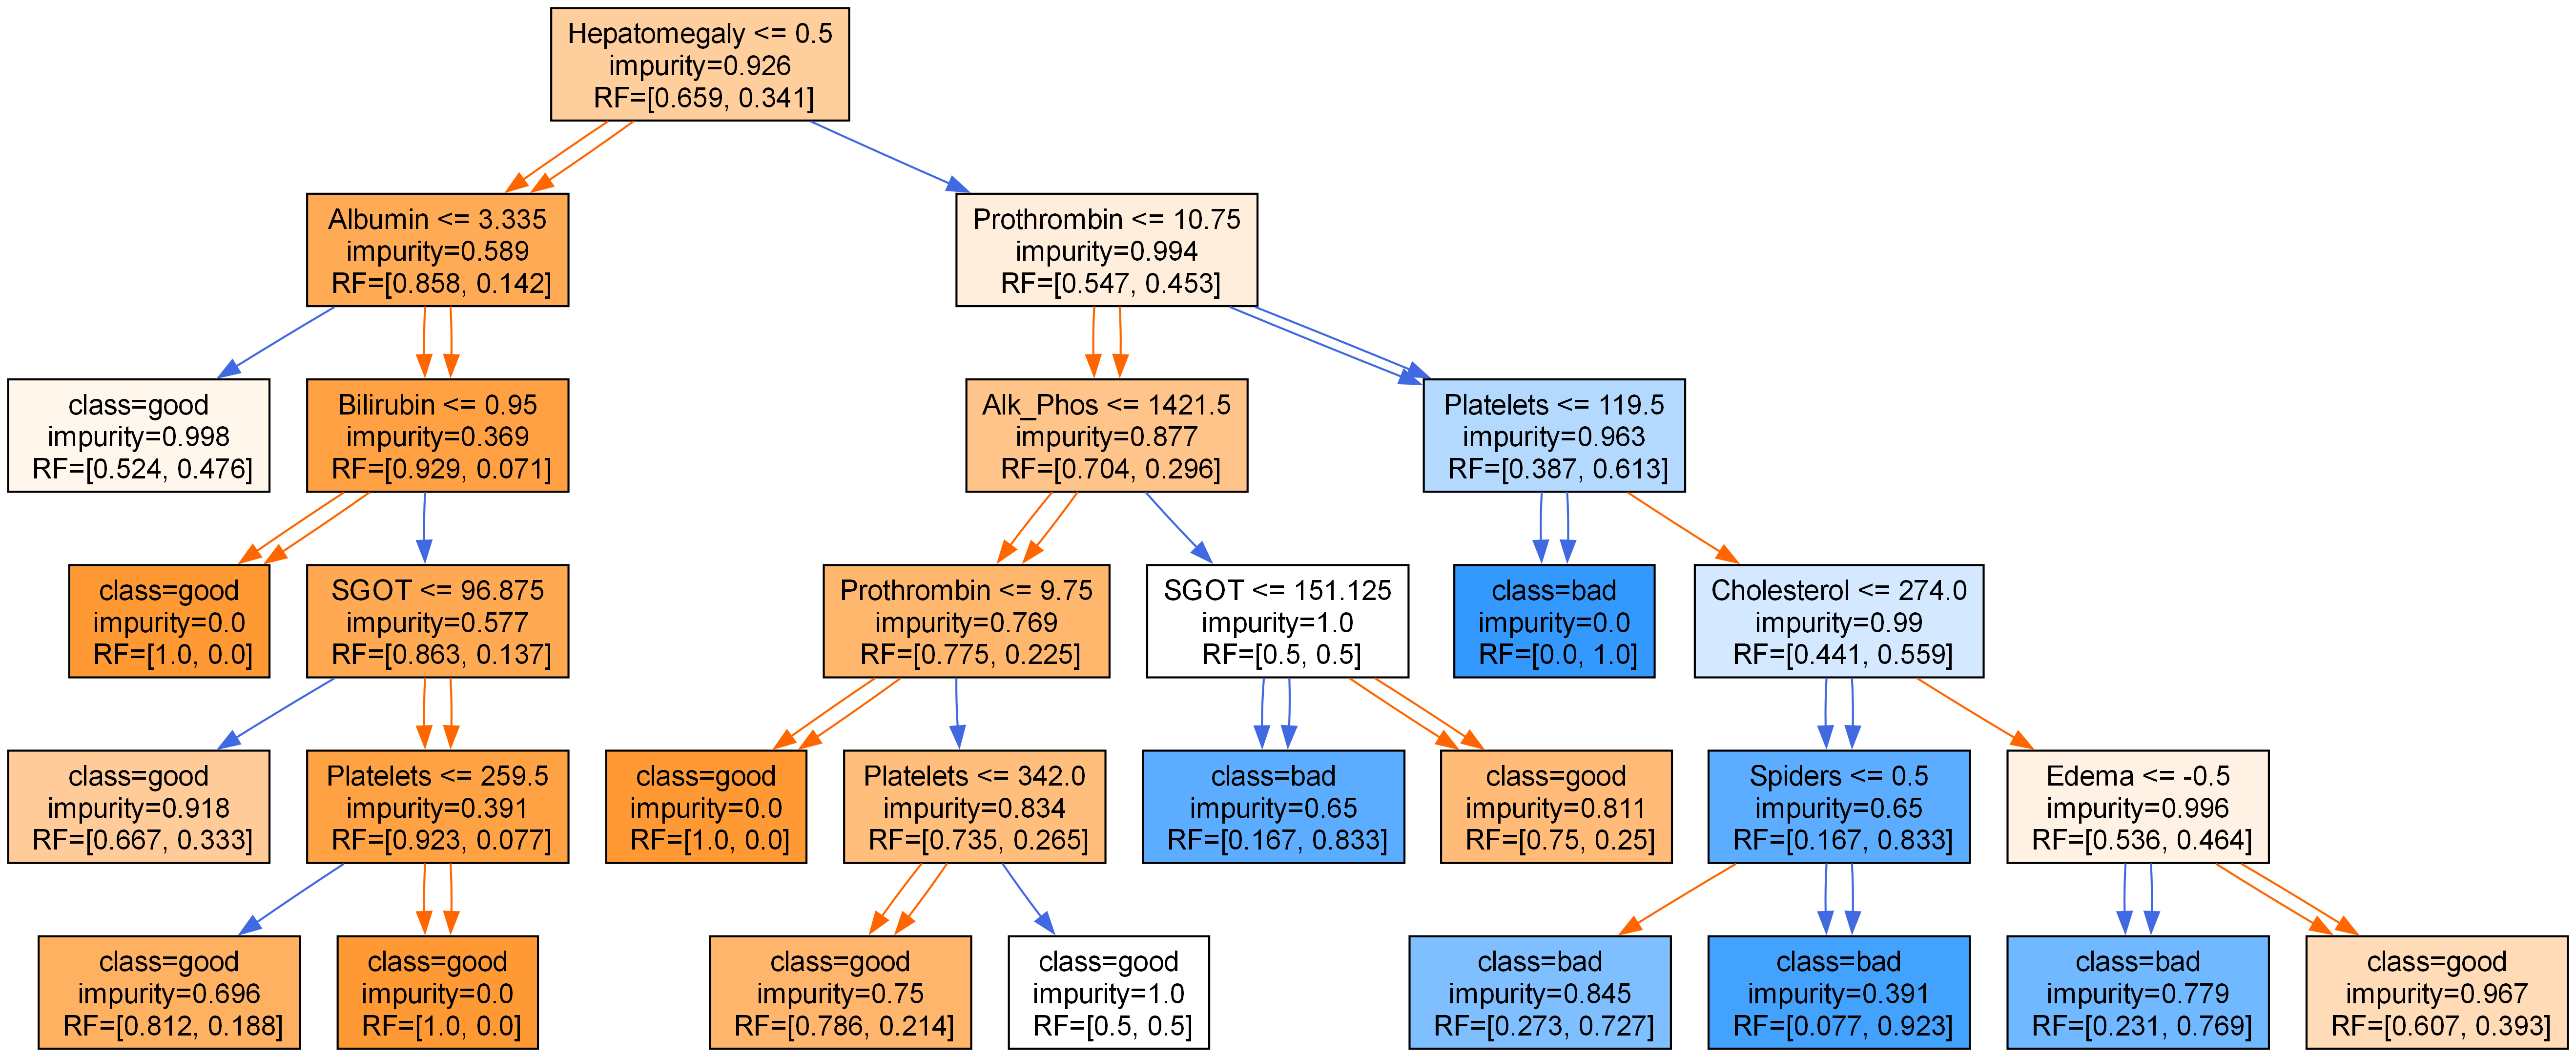

Color Decision Tree saved as 'color_dt.png'


In [78]:


color_dt = colorDT(model=dt, feature_names=feature_names, class_names=class_names)
color_dt.display_color_tree()
color_dt.save_color_tree(output_file='color_dt')

In [79]:
color_dt.display_rules(X_train, y_train)

Hepatomegaly
Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
       'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object')


AttributeError: 'Index' object has no attribute 'index'